In [1]:
# import time
import os
from skimage import io
import scipy as sp
import numpy as np
# import sys
import openpnm as op
import porespy as ps
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
np.set_printoptions(precision=4)
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math
import pickle
import seaborn as sns

In [2]:
print(op.__version__)
print(ps.__version__)

3.5.0
2.4.3


In [3]:
# Matplotlib plotting controls
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')
params = {'figure.autolayout': True,
          'figure.titleweight': 'bold',
          'font.weight': 'bold',
          'font.size': 14,
          'font.family': 'sans-serif',
          'font.sans-serif': 'Arial',
          'legend.fontsize': 12,
#           'legend.title_fontsize':10,
          'figure.figsize': (6, 5),
          'figure.titlesize': 14,
          'axes.labelsize': 12,
          'axes.labelweight': 'bold',
          'axes.titlesize': 14,
          'axes.linewidth': 2,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.top': True,
          'xtick.bottom': True,
          'xtick.labeltop': False,
          'xtick.labelbottom': True,
          'ytick.left': True,
          'ytick.right': True,
          'ytick.labelright': False,
          'ytick.labelleft': True,
          'ytick.major.size': 5.5,
          'ytick.major.width': 0.8,
          'xtick.major.size': 5.5,
          'xtick.major.width': 0.8,
          'ytick.minor.size': 3.5,
          'ytick.minor.width': 0.6,
          'xtick.minor.size': 3.5,
          'xtick.minor.width': 0.6,
        'xtick.minor.visible':True,
         'ytick.minor.visible':True}
rcParams.update(params)

# Step1: Read in files and prep work

In [4]:
#Read in all tif stacks

voxel_size = 6e-9

numSamples = 3
numRegions = 6

sampleNames = ['pris','uncomp','comp']
regionIndicators = list(range(1,numRegions+1))

im = []

path = 'data/1p2um volumes/'
for i,x in enumerate(sampleNames):
    im_temp = []
    for j,y in enumerate(regionIndicators):
        im_temp.append(io.imread(path+x+'_1p2um/'+x+'_1p2um_'+str(y)+'.tif'))
    im.append(im_temp)
        
#separate solid and void
im_solid = []
im_void = []

for i,x in enumerate(im):
    solid_temp = []
    void_temp = []
    for j, y in enumerate(x):
        solid_temp.append(y != 0)
        void_temp.append(y == 0)
    im_solid.append(solid_temp)
    im_void.append(void_temp)

im_solid = np.array(im_solid)
im_void = np.array(im_void)

im_total = [im_solid, im_void]
im_total = np.array(im_total)

#check
print('im_solid array shape:', im_solid.shape)
print('im_void array shape:',im_void.shape)
print()
print('im_total array shape:',im_total.shape)

im_solid array shape: (3, 6, 200, 200, 200)
im_void array shape: (3, 6, 200, 200, 200)

im_total array shape: (2, 3, 6, 200, 200, 200)


In [5]:
# directions = [['xmin','xmax'],['ymin','ymax'],['zmin','zmax']]

# tort_sims = []
# for b,bin in enumerate(im_total):
#     bin_temp = []
#     for s,sample in enumerate(bin):
#         sample_temp = []
#         for r,region in enumerate(sample):
#             region_temp = []
#             for d, direction in enumerate(directions):
#                 dir_temp = ps.simulations.tortuosity_fd(region,d)
#                 region_temp.append(dir_temp)

#             sample_temp.append(region_temp)
#         bin_temp.append(sample_temp)
#     tort_sims.append(bin_temp)

In [6]:
# region=im_total[0][0][0]
# test = ps.simulations.tortuosity_fd(region,0)


# print(test)
# kf = test.effective_porosity/test.tortuosity
# print(kf)

In [7]:
# #Run Snow algorithm for pore network extraction 
# #https://porespy.org/modules/generated/generated/porespy.networks.snow2.html#porespy.networks.snow2


# snow_solid = []
# for x in (im_solid):
#     snow_temp = []
#     for y in x:
#         snow_temp.append(ps.networks.snow2(y, accuracy='standard', voxel_size=voxel_size))
#     snow_solid.append(snow_temp)
    
# snow_void = []
# for x in (im_void):
#     snow_temp = []
#     for y in x:
#         snow_temp.append(ps.networks.snow2(y, accuracy='standard', voxel_size=voxel_size))
#     snow_void.append(snow_temp)



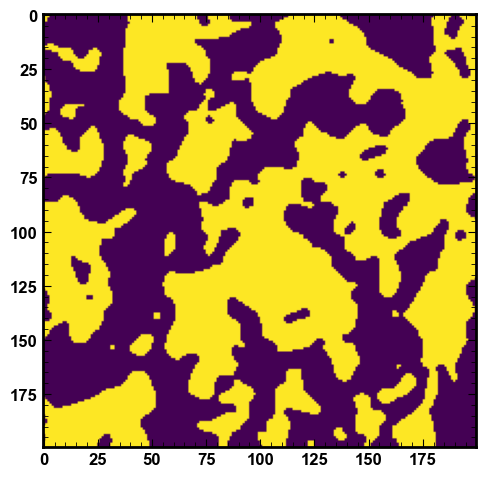

In [8]:
### testing changes to snow alg call

im_test = im_void[0][0]
im_test = im_test + 1
# im_test
plt.imshow(im_test[:,100,:])

In [9]:
# snow_test = ps.networks.snow2(im_test, accuracy='standard', voxel_size=voxel_size)

In [10]:
# print(snow_test.network)

In [11]:
# pn_test = ps.networks.regions_to_network(snow_test.regions)

In [12]:
# print(snow_test)

In [13]:
# # #Store the snow network extractions to save computational time if notebook restarts
# %store snow_solid
# %store snow_void

In [14]:
#Restore the snow network extractions if needed
%store -r snow_solid
%store -r snow_void

In [15]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10, 5])

# ax1.imshow(ps.tools.randomize_colors(snow_test.regions[:,100,:]),cmap='nipy_spectral_r')

# snow_compare = snow_void[0][0]
# ax2.imshow(ps.tools.randomize_colors(snow_compare.regions[:,100,:]),cmap='nipy_spectral_r')



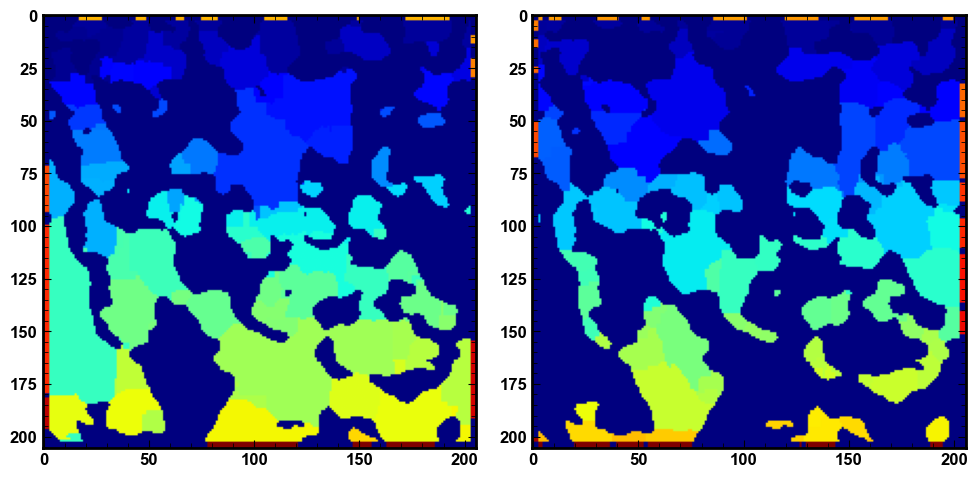

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10, 5])

ax1.imshow(snow_void[1][0].regions[:,100,:],cmap='jet')
ax2.imshow(snow_solid[1][0].regions[:,100,:],cmap='jet')

In [17]:
snow_solid_networks = [[obj.network for obj in sublist] for sublist in snow_solid]
snow_void_networks = [[obj.network for obj in sublist] for sublist in snow_void]

path = './data/1p2um volumes/'

with open(path+"snow_solid_1p2um_networks.pkl", "wb") as f:
    pickle.dump(snow_solid_networks, f)

with open(path+"snow_void_1p2um_networks.pkl", "wb") as f:
    pickle.dump(snow_void_networks, f)

In [18]:
path = './data/1p2um volumes/'

with open(path+"snow_solid_1p2um_networks.pkl", "rb") as f:
    snow_solid_networks = pickle.load(f)

with open(path+"snow_void_1p2um_networks.pkl", "rb") as f:
    snow_void_networks = pickle.load(f)

snow_total_networks = [snow_solid_networks,snow_void_networks]

In [19]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [20]:
s = 0
r = 0


In [21]:
# Reset region
s = 0
r = 0
print(snow_void_networks[s][r]['pore.equivalent_diameter'])
print(snow_void_networks[s][r]['pore.extended_diameter'])
print(snow_void_networks[s][r]['pore.inscribed_diameter'])
print(snow_void_networks[s][r]['pore.volume'])

print((np.pi*snow_void_networks[s][r]['pore.equivalent_diameter']**3/6))
print((np.pi*snow_void_networks[s][r]['pore.extended_diameter']**3/6))
print((np.pi*snow_void_networks[s][r]['pore.inscribed_diameter']**3/6))



region = op.io.network_from_porespy(snow_void_networks[s][r])

print(region)

[3.2472e-08 1.2122e-07 2.7191e-07 ... 3.4437e-08 3.2602e-08 2.5876e-08]
[6.0000e-08 1.0461e-07 3.2820e-07 ... 6.9971e-08 4.8000e-08 6.0000e-08]
[2.4000e-08 7.9599e-08 1.3200e-07 ... 2.4000e-08 2.4000e-08 1.6971e-08]
[1.7928e-23 9.3269e-22 1.0526e-20 ... 2.1384e-23 1.8144e-23 9.0720e-24]
[1.7928e-23 9.3269e-22 1.0526e-20 ... 2.1384e-23 1.8144e-23 9.0720e-24]
[1.1310e-22 5.9946e-22 1.8510e-20 ... 1.7937e-22 5.7906e-23 1.1310e-22]
[7.2382e-24 2.6407e-22 1.2043e-21 ... 7.2382e-24 7.2382e-24 2.5591e-24]

══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Network at 0x1805e4810>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  throat.conns                                                  3307 / 3307
  3  pore.coords                                     

In [22]:
inlets = region.pores('xmin')
outlets = region.pores('xmax')
area_test = op.topotools.get_domain_area(region,inlets=inlets,outlets=outlets)
print(area_test)

length_test = op.topotools.get_domain_length(region,inlets=inlets,outlets=outlets)
print(length_test)


[13:41:13] WARNING  Attempting to estimate inlet area...will be low                              ]8;id=490509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/topotools/_topotools.py\_topotools.py]8;;\:]8;id=602642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/topotools/_topotools.py#1046\1046]8;;\

           ERROR    Inlet and outlet faces are different area                                    ]8;id=159786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/topotools/_topotools.py\_topotools.py]8;;\:]8;id=548601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/topotools/_topotools.py#1064\1064]8;;\

1.3735321493216628e-12


           WARNING  Attempting to estimate domain length...could be low if boundary pores were   ]8;id=632988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/topotools/_topotools.py\_topotools.py]8;;\:]8;id=663591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/topotools/_topotools.py#1090\1090]8;;\
                    not added                                                                                      

1.2180106057356126e-06


In [23]:
# test = ps.simulations.tortuosity_fd(im_void[s][r],0)
# print(test)
# kf = test.effective_porosity/test.tortuosity
# print(kf)

# test1 = ps.simulations.tortuosity_fd(im_void[s][r],1)
# print(test1)
# kf1 = test1.effective_porosity/test1.tortuosity
# print(kf1)

# test2 = ps.simulations.tortuosity_fd(im_void[s][r],2)
# print(test2)
# kf2 = test2.effective_porosity/test2.tortuosity
# print(kf2)

In [20]:
op.visualization.plot_notebook(region,
                               node_size=region['pore.equivalent_diameter'],
                               node_color=region['pore.extended_diameter'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [325]:
import openpnm.models as mods

spheres_and_cylinders_KF = {
    # 'pore.seed': {
    #     'model': mods.misc.random,
    #     'element': 'pore',
    #     'num_range': [0.2, 0.7],
    #     'seed': None,
    # },
    'pore.max_size': {
        'model': mods.geometry.pore_size.largest_sphere,
        'iters': 10,
    },
    'pore.diameter': {
        # 'model': mods.misc.product,
        # 'props': ['pore.max_size', 'pore.seed'],
        'model': mods.misc.scaled,
        'factor': 0.9,
        'prop': 'pore.max_size',
    },
    'pore.volume': {
        'model': mods.geometry.pore_volume.sphere,
        'pore_diameter': 'pore.diameter',
    },
    'throat.max_size': {
        'model': mods.misc.from_neighbor_pores,
        'mode': 'min',
        'prop': 'pore.diameter',
    },
    'throat.diameter': {
        'model': mods.misc.scaled,
        'factor': 0.8,
        'prop': 'throat.max_size',
    },
    'throat.length': {
        'model': mods.geometry.throat_length.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.cross_sectional_area': {
        'model': mods.geometry.throat_cross_sectional_area.cylinder,
        'throat_diameter': 'throat.diameter',
    },
    'throat.total_volume': {
        'model': mods.geometry.throat_volume.cylinder,
        'throat_diameter': 'throat.diameter',
        'throat_length': 'throat.length',
    },
    'throat.lens_volume': {
        'model': mods.geometry.throat_volume.lens,
        'throat_diameter': 'throat.diameter',
        'pore_diameter': 'pore.diameter',
    },
    'throat.volume': {
        'model': mods.misc.difference,
        'props': ['throat.total_volume', 'throat.lens_volume'],
    },
    'throat.diffusive_size_factors': {
        'model': mods.geometry.diffusive_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.hydraulic_size_factors': {
        'model': mods.geometry.hydraulic_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
}


In [326]:
# Reset region
s = 0
r = 0
region = op.io.network_from_porespy(snow_void_networks[s][r])
h = op.utils.check_network_health(region)
# print(h)
op.topotools.trim(network=region, pores=h['disconnected_pores'])
h = op.utils.check_network_health(region)
# print(h);

region.add_model_collection(spheres_and_cylinders_KF)
region.regenerate_models()


phase = op.phase.Phase(network=region)
phase['pore.diffusivity'] = 1

region['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase)

In [327]:
print(np.sum(region['pore.volume']))

4.784294831042505e-19


In [328]:
op.visualization.plot_notebook(region,
                               node_size=region['pore.diameter'],
                               node_color=region['pore.diameter'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [329]:
inlet = region.pores('xmax')
outlet = region.pores('xmin')
Diff = op.algorithms.FickianDiffusion(network=region, phase=phase)
C_in, C_out = [1, 0]
Diff.set_value_BC(pores=inlet, values=C_in)
Diff.set_value_BC(pores=outlet, values=C_out)
Diff.run()

In [330]:
print(Diff)


══════════════════════════════════════════════════════════════════════════════
fick_02 : <openpnm.algorithms.FickianDiffusion at 0x19b1e6b10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.bc.rate                                                     0 / 1669
  3  pore.bc.value                                                  185 / 1669
  4  pore.concentration                                            1669 / 1669
  5  pore.initial_guess                                            1669 / 1669
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                      

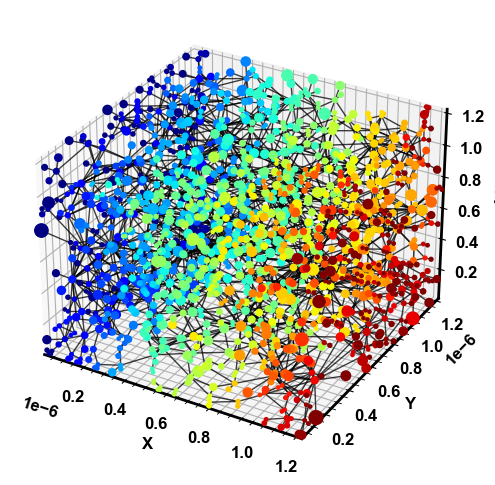

In [331]:
import matplotlib as mpl


fig, ax = plt.subplots(figsize=[5, 5])

colors = Diff['pore.concentration']
op.visualization.plot_connections(ax=ax,
                                network=region,
                                alpha=0.75, linewidth=1,color='k',
                                  )
op.visualization.plot_coordinates(ax=ax,
                                network=region,
                                size_by=region["pore.diameter"],
                                color_by=colors, 
                                markersize=100)


norm = mpl.colors.Normalize(vmin=colors.min(), vmax=colors.max())
sm = mpl.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  # required for matplotlib < 3.6
# plt.axis('off')

# cbar = fig.colorbar(sm,ax=ax)
# cbar.set_label("Concentration")
plt.show()

In [332]:

op.visualization.plot_notebook(region,
                               node_size=region['pore.diameter'],
                               node_color=Diff['pore.concentration'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [333]:
print(region.project)

══════════════════════════════════════════════════════════════════════════════
Object Name : Object Class and ID
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
net : <openpnm.network.Network at 0x19b3867a0>
phase_01 : <openpnm.phase.Phase at 0x19bb8f060>
fick_02 : <openpnm.algorithms.FickianDiffusion at 0x19b1e6b10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [334]:
current_directory = os.getcwd()
op.io._vtk.project_to_vtk(region.project,filename=current_directory+'/ParaView/Paraview_test')

In [335]:
print((region['throat.diffusive_size_factors'][:,1]))

with open("output.txt", "w") as f:
    for item in phase['throat.diffusive_conductance']:
        f.write(str(item) + "\n")

[2.2651e-09 2.0113e-08 1.8011e-08 ... 1.3678e-08 1.3060e-08 1.4140e-08]


In [336]:
# NBVAL_IGNORE_OUTPUT
R = Diff.rate(pores=inlet,mode='group')
print(R)
R = np.sum(R)
print(R)

L = im_total[0][0][0].shape[0]*voxel_size

# area of inlet (and outlet)
A = (im_total[0][0][0].shape[(0+1)%3]*voxel_size)*(im_total[0][0][0].shape[(0+2)%3]*voxel_size)
pore_area = np.pi * (region['pore.diameter']/2.0)**2
inlet_area_sum = np.sum(pore_area[inlet])
# A = inlet_area_sum

print(A)
print(L)
D_eff = R * (L) / (A) / (C_in - C_out)
F = D_eff/phase['pore.diffusivity'][0]
print(f'Formation factor is: {F:.4f}')

[1.4648e-07]
1.4647656725739615e-07
1.44e-12
1.2e-06
Formation factor is: 0.1221


# Formation Factor

In [173]:
import openpnm.models as mods

spheres_and_cylinders_KF = {
    # 'pore.seed': {
    #     'model': mods.misc.random,
    #     'element': 'pore',
    #     'num_range': [0.2, 0.7],
    #     'seed': None,
    # },
    'pore.max_size': {
        'model': mods.geometry.pore_size.largest_sphere,
        'iters': 10,
    },
    'pore.diameter': {
        # 'model': mods.misc.product,
        # 'props': ['pore.max_size', 'pore.seed'],
        'model': mods.misc.scaled,
        'factor': 1,
        'prop': 'pore.max_size',
    },
    'pore.volume': {
        'model': mods.geometry.pore_volume.sphere,
        'pore_diameter': 'pore.diameter',
    },
    'throat.max_size': {
        'model': mods.misc.from_neighbor_pores,
        'mode': 'min',
        'prop': 'pore.diameter',
    },
    'throat.diameter': {
        'model': mods.misc.scaled,
        'factor': 0.99,
        'prop': 'throat.max_size',
    },
    'throat.length': {
        'model': mods.geometry.throat_length.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.cross_sectional_area': {
        'model': mods.geometry.throat_cross_sectional_area.cylinder,
        'throat_diameter': 'throat.diameter',
    },
    'throat.total_volume': {
        'model': mods.geometry.throat_volume.cylinder,
        'throat_diameter': 'throat.diameter',
        'throat_length': 'throat.length',
    },
    'throat.lens_volume': {
        'model': mods.geometry.throat_volume.lens,
        'throat_diameter': 'throat.diameter',
        'pore_diameter': 'pore.diameter',
    },
    'throat.volume': {
        'model': mods.misc.difference,
        'props': ['throat.total_volume', 'throat.lens_volume'],
    },
    'throat.diffusive_size_factors': {
        'model': mods.geometry.diffusive_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.hydraulic_size_factors': {
        'model': mods.geometry.hydraulic_size_factors.spheres_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
}


In [174]:
import openpnm.models as mods


cones_and_cylinders_KF = {
    # 'pore.seed': {
    #     'model': mods.misc.random,
    #     'element': 'pore',
    #     'num_range': [0.2, 0.7],
    #     'seed': None,
    # },
    'pore.max_size': {
        'model': mods.geometry.pore_size.largest_sphere,
        'iters': 10,
    },
    'pore.diameter': {
        # 'model': mods.misc.product,
        # 'props': ['pore.max_size', 'pore.seed'],
        'model': mods.misc.scaled,
        'factor': 1,
        'prop': 'pore.max_size',
    },
    'pore.volume': {
        'model': mods.geometry.pore_volume.sphere,
        'pore_diameter': 'pore.diameter',
    },
    'throat.max_size': {
        'model': mods.misc.from_neighbor_pores,
        'mode': 'min',
        'prop': 'pore.diameter',
    },
    'throat.diameter': {
        'model': mods.misc.scaled,
        'factor': 0.8,
        'prop': 'throat.max_size',
    },
    'throat.length': {
        'model': mods.geometry.throat_length.cones_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.volume': {
        'model': mods.geometry.throat_volume.cylinder,
        'throat_diameter': 'throat.diameter',
        'throat_length': 'throat.length',
    },
    'throat.cross_sectional_area': {
        'model': mods.geometry.throat_cross_sectional_area.cylinder,
        'throat_diameter': 'throat.diameter',
    },
    'throat.diffusive_size_factors': {
        'model': mods.geometry.diffusive_size_factors.cones_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
    'throat.hydraulic_size_factors': {
        'model': mods.geometry.hydraulic_size_factors.cones_and_cylinders,
        'pore_diameter': 'pore.diameter',
        'throat_diameter': 'throat.diameter',
    },
}

In [764]:
# Reinitialize networks
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [765]:
print(pn_total[0][0][0])


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Network at 0x19836e250>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  throat.conns                                                  4294 / 4294
  3  pore.coords                                                   1904 / 1904
  4  pore.region_label                                             1904 / 1904
  5  pore.phase                                                    1904 / 1904
  6  throat.phases                                                 4294 / 4294
  7  pore.region_volume                                            1904 / 1904
  8  pore.equivalent_diameter                                      1904 / 1904
  9  pore.local_peak                                               1904 / 1904
 10 

In [808]:
phases = []
Diffs = []
formfactors = []
total_volumes = []
for b,bin in enumerate(pn_total):
    bin_phases = []
    bin_Diffs = []
    bin_formfactors = []
    bin_total_volume = []
    for s,sample in enumerate(bin):
        sample_phases = []
        sample_Diffs = []
        sample_formfactors = []
        sample_total_volume = []
        for r,region in enumerate(sample):

            h = op.utils.check_network_health(region)
            # print(h)
            op.topotools.trim(network=region, pores=h['disconnected_pores'])
            h = op.utils.check_network_health(region)
            # print(h);

            # # pore extended diameter best matches MIP water retention curve 
            # region['pore.diameter'] = region['pore.extended_diameter'] 
            
            # # pore equivalent diameter best matches taufactor formation factor results
            region['pore.diameter'] = region['pore.equivalent_diameter']

            region['throat.diameter'] = region['throat.inscribed_diameter']
            region['pore.volume'] = op.models.geometry.pore_volume.sphere(region,pore_diameter='pore.equivalent_diameter')

            region.add_model(propname='throat.coords',model=op.models.geometry.throat_centroid.pore_coords)
            region.add_model(propname='throat.diffusive_size_factors',model=op.models.geometry.diffusive_size_factors.hybrid_cones_and_cylinders)
            region.add_model(propname='throat.length',model=op.models.geometry.throat_length.hybrid_cones_and_cylinders)
            region.add_model(propname='throat.volume',model=op.models.geometry.throat_volume.cylinder)
            

            region.regenerate_models()

            total_volume = np.sum(region['pore.volume']) + np.sum(region['throat.volume'])

            phase = op.phase.Phase(network=region, name='phase_{}_{}_{}'.format(b,s,r))
            phase['pore.diffusivity'] = 1

            region['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase)

            inlet = region.pores('xmax')
            outlet = region.pores('xmin')
            op.algorithms.FickianDiffusion(network=region, phase=phase)
            Diff = op.algorithms.FickianDiffusion(network=region, phase=phase)
            C_in, C_out = [1, 0]
            Diff.set_value_BC(pores=inlet, values=C_in)
            Diff.set_value_BC(pores=outlet, values=C_out)
            Diff.run()

            R = np.sum(Diff.rate(pores=inlet,mode='group'))
            A = 1.44e-12
            L = 1.2e-6
            Deff = R * (L) / (A) / (C_in - C_out)
            F = Deff/phase['pore.diffusivity'][0]
            print(f'Formation factor is: {F:.4f}')

            sample_phases.append(phase)
            sample_Diffs.append(Diff)
            sample_formfactors.append(F)
            sample_total_volume.append(total_volume)
    
        bin_phases.append(sample_phases)
        bin_Diffs.append(sample_Diffs)
        bin_formfactors.append(sample_formfactors)
        bin_total_volume.append(sample_total_volume)

    phases.append(bin_phases)
    Diffs.append(bin_Diffs)
    formfactors.append(bin_formfactors)
    total_volumes.append(bin_total_volume)
phases = np.array(phases)
Diffs = np.array(Diffs)
formfactors = np.array(formfactors)
total_volumes = np.array(total_volumes)


[23:10:22] WARNING  phase_0_0_0 is already taken, using phase_0_0_03 instead                        ]8;id=666270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=945817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2546


           WARNING  phase_0_0_1 is already taken, using phase_0_0_04 instead                        ]8;id=975839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=982106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2379


           WARNING  phase_0_0_2 is already taken, using phase_0_0_05 instead                        ]8;id=241627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=716211;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2374


           WARNING  phase_0_0_3 is already taken, using phase_0_0_06 instead                        ]8;id=581545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=325871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2693


           WARNING  phase_0_0_4 is already taken, using phase_0_0_07 instead                        ]8;id=499534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=428203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2027


           WARNING  phase_0_0_5 is already taken, using phase_0_0_08 instead                        ]8;id=651393;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=223532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2442


           WARNING  phase_0_1_0 is already taken, using phase_0_1_03 instead                        ]8;id=210885;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=900424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2170


           WARNING  phase_0_1_1 is already taken, using phase_0_1_04 instead                        ]8;id=27071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=396375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.1596


           WARNING  phase_0_1_2 is already taken, using phase_0_1_05 instead                        ]8;id=577337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=56837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.1426


[23:10:23] WARNING  phase_0_1_3 is already taken, using phase_0_1_06 instead                        ]8;id=91450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=695952;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.1943


           WARNING  phase_0_1_4 is already taken, using phase_0_1_07 instead                        ]8;id=990176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=843274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2764


           WARNING  phase_0_1_5 is already taken, using phase_0_1_08 instead                        ]8;id=911000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=141315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2181


           WARNING  phase_0_2_0 is already taken, using phase_0_2_03 instead                        ]8;id=600494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=312092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3855


           WARNING  phase_0_2_1 is already taken, using phase_0_2_04 instead                        ]8;id=788100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=890430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.4009


           WARNING  phase_0_2_2 is already taken, using phase_0_2_05 instead                        ]8;id=92506;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=721926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3676


           WARNING  phase_0_2_3 is already taken, using phase_0_2_06 instead                        ]8;id=257155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=708405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3229


           WARNING  phase_0_2_4 is already taken, using phase_0_2_07 instead                        ]8;id=849708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=609167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3587


[23:10:24] WARNING  phase_0_2_5 is already taken, using phase_0_2_08 instead                        ]8;id=564339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=102403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3840


           WARNING  phase_1_0_0 is already taken, using phase_1_0_03 instead                        ]8;id=534940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=390769;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2663


           WARNING  phase_1_0_1 is already taken, using phase_1_0_04 instead                        ]8;id=616209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=914484;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2698


           WARNING  phase_1_0_2 is already taken, using phase_1_0_05 instead                        ]8;id=571618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=282553;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2709


           WARNING  phase_1_0_3 is already taken, using phase_1_0_06 instead                        ]8;id=491180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=675628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2728


           WARNING  phase_1_0_4 is already taken, using phase_1_0_07 instead                        ]8;id=504588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=815715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2633


           WARNING  phase_1_0_5 is already taken, using phase_1_0_08 instead                        ]8;id=346325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=159701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2740


           WARNING  phase_1_1_0 is already taken, using phase_1_1_03 instead                        ]8;id=413524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=743858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3132


           WARNING  phase_1_1_1 is already taken, using phase_1_1_04 instead                        ]8;id=14652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=175333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3257


[23:10:25] WARNING  phase_1_1_2 is already taken, using phase_1_1_05 instead                        ]8;id=761590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=450841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2697


           WARNING  phase_1_1_3 is already taken, using phase_1_1_06 instead                        ]8;id=950562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=940107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2355


           WARNING  phase_1_1_4 is already taken, using phase_1_1_07 instead                        ]8;id=761525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=323615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.3153


           WARNING  phase_1_1_5 is already taken, using phase_1_1_08 instead                        ]8;id=202545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=716599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2664


           WARNING  phase_1_2_0 is already taken, using phase_1_2_03 instead                        ]8;id=947873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=82556;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.1542


           WARNING  phase_1_2_1 is already taken, using phase_1_2_04 instead                        ]8;id=438529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=77472;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2148


           WARNING  phase_1_2_2 is already taken, using phase_1_2_05 instead                        ]8;id=505057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=632984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.1597


           WARNING  phase_1_2_3 is already taken, using phase_1_2_06 instead                        ]8;id=612920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=67482;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.2013


           WARNING  phase_1_2_4 is already taken, using phase_1_2_07 instead                        ]8;id=488997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=571862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.1995


[23:10:26] WARNING  phase_1_2_5 is already taken, using phase_1_2_08 instead                        ]8;id=355310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=462618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Formation factor is: 0.1775


In [809]:
region=pn_total[0][0][0]
print(np.sum(np.isinf(region['throat.diffusive_size_factors'][:,1])))
print(len(region['throat.diffusive_size_factors'][:,1]))

3278
4286


In [810]:
# print(np.sum(region['throat.diffusive_conductance'] <0))
for i in region['throat.diffusive_conductance']:
    if i < 0:
        print(i)

(array([154., 146., 104., 112., 198., 147., 454., 108., 170., 327., 346.,
        182., 240., 237., 178., 164., 173., 167.,  94.,  91.,  69., 111.,
         58.,  42.,  46.,  26.,  20.,  26.,  16.,  19.,   8.,   8.,  11.,
          5.,   4.,   2.,   8.,   2.,   3.,   2.,   0.,   1.,   0.,   1.,
          1.,   1.,   1.,   0.,   1.,   2.]),
 array([ 12.    ,  15.4548,  18.9095,  22.3643,  25.819 ,  29.2738,
         32.7285,  36.1833,  39.638 ,  43.0928,  46.5475,  50.0023,
         53.457 ,  56.9118,  60.3665,  63.8213,  67.276 ,  70.7308,
         74.1856,  77.6403,  81.0951,  84.5498,  88.0046,  91.4593,
         94.9141,  98.3688, 101.8236, 105.2783, 108.7331, 112.1878,
        115.6426, 119.0973, 122.5521, 126.0068, 129.4616, 132.9164,
        136.3711, 139.8259, 143.2806, 146.7354, 150.1901, 153.6449,
        157.0996, 160.5544, 164.0091, 167.4639, 170.9186, 174.3734,
        177.8281, 181.2829, 184.7376]),
 <BarContainer object of 50 artists>)

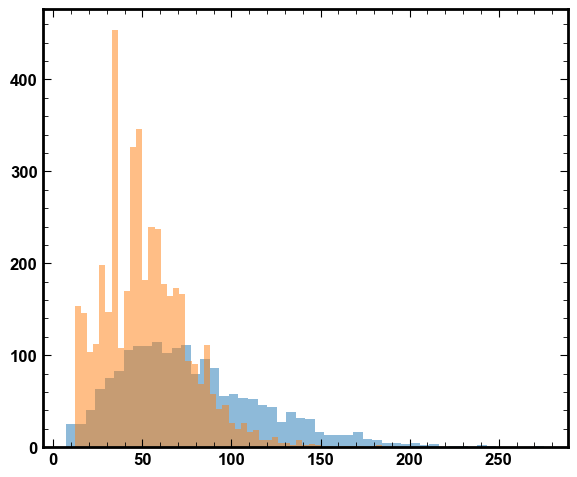

In [811]:
plt.hist(region['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(region['throat.diameter']*10**9, bins=50,alpha=0.5)

# plt.hist(pn_total[0][0][1]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][2]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][3]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][4]['pore.diameter']*10**9, bins=50,alpha=0.5)
# plt.hist(pn_total[0][0][5]['pore.diameter']*10**9, bins=50,alpha=0.5)


(array([ 53.,  47.,  65., 109., 118., 142., 114., 124., 120.,  88.,  92.,
         73.,  57.,  49.,  54.,  36.,  31.,  27.,  19.,  17.,  17.,  14.,
          6.,  13.,   4.,   2.,   7.,   5.,   1.,   5.,   2.,   6.,   6.,
          4.,   2.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   2.,   0.,   1.,   1.]),
 array([ 10.7364,  17.7859,  24.8354,  31.8849,  38.9344,  45.9839,
         53.0334,  60.0829,  67.1324,  74.1819,  81.2314,  88.2809,
         95.3304, 102.3799, 109.4294, 116.4789, 123.5284, 130.5779,
        137.6274, 144.6769, 151.7264, 158.7759, 165.8254, 172.8749,
        179.9244, 186.9739, 194.0234, 201.0729, 208.1223, 215.1718,
        222.2213, 229.2708, 236.3203, 243.3698, 250.4193, 257.4688,
        264.5183, 271.5678, 278.6173, 285.6668, 292.7163, 299.7658,
        306.8153, 313.8648, 320.9143, 327.9638, 335.0133, 342.0628,
        349.1123, 356.1618, 363.2113]),
 <BarContainer object of 50 artists>)

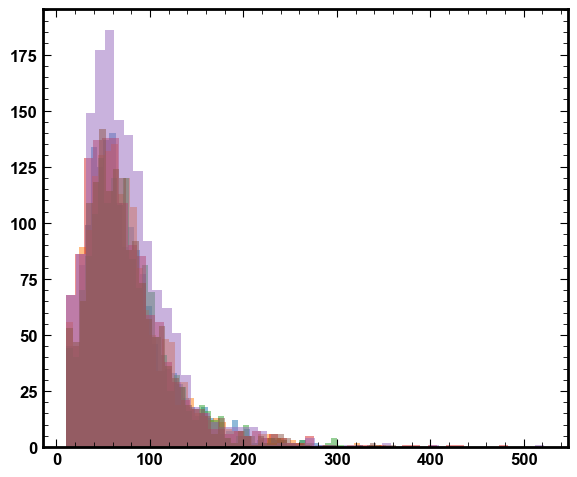

In [812]:
plt.hist(pn_total[1][0][0]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][1]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][2]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][3]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][4]['pore.diameter']*10**9, bins=50,alpha=0.5)
plt.hist(pn_total[1][0][5]['pore.diameter']*10**9, bins=50,alpha=0.5)


In [813]:
#calculate both phase volume fractions using the pore network 

total_volume_fractions = []
for b,bin in enumerate(total_volumes):
    bin_volume_fractions = []

    for s,sample in enumerate(bin):
        sample_volume_fractions = []
        for r,region in enumerate(sample):
            sample_volume_fractions.append(region/(region+total_volumes[(b+1)%2][s][r]))
        bin_volume_fractions.append(sample_volume_fractions)
    total_volume_fractions.append(bin_volume_fractions)

total_volume_fractions = np.array(total_volume_fractions)

print(total_volume_fractions)
print()
print(formfactors)

[[[0.4923 0.4927 0.4807 0.4739 0.4806 0.4934]
  [0.4506 0.4113 0.4129 0.4582 0.4605 0.4685]
  [0.5997 0.5684 0.581  0.5659 0.5814 0.5883]]

 [[0.5077 0.5073 0.5193 0.5261 0.5194 0.5066]
  [0.5494 0.5887 0.5871 0.5418 0.5395 0.5315]
  [0.4003 0.4316 0.419  0.4341 0.4186 0.4117]]]

[[[0.2546 0.2379 0.2374 0.2693 0.2027 0.2442]
  [0.217  0.1596 0.1426 0.1943 0.2764 0.2181]
  [0.3855 0.4009 0.3676 0.3229 0.3587 0.384 ]]

 [[0.2663 0.2698 0.2709 0.2728 0.2633 0.274 ]
  [0.3132 0.3257 0.2697 0.2355 0.3153 0.2664]
  [0.1542 0.2148 0.1597 0.2013 0.1995 0.1775]]]


In [814]:
for b,bin in enumerate(total_volume_fractions):
    for s,sample in enumerate(bin):
        for r,region in enumerate(sample):
            complete_volume = region+total_volume_fractions[(b+1)%2][s][r]
            if complete_volume != 1:
                print('solid + void volume fractions do not add to 1: ', complete_volume)


solid + void volume fractions do not add to 1:  0.9999999999999999
solid + void volume fractions do not add to 1:  0.9999999999999999
solid + void volume fractions do not add to 1:  0.9999999999999999
solid + void volume fractions do not add to 1:  0.9999999999999999
solid + void volume fractions do not add to 1:  0.9999999999999999
solid + void volume fractions do not add to 1:  0.9999999999999999


In [815]:
for s,sample in enumerate(total_volumes[0]):
    for r,region in enumerate(sample):
        complete_volume = region + total_volumes[1][s][r]
        percent_error = (complete_volume-(1.2e-6)**3)/((1.2e-6)**3)
        print('{:.2f}%'.format(percent_error*100))
    print()

9.50%
9.19%
9.63%
9.45%
9.58%
9.32%

9.53%
9.71%
10.07%
9.29%
9.99%
8.92%

9.70%
9.68%
9.90%
9.97%
10.12%
9.42%



In [816]:
for s,sample in enumerate(total_volumes[0]):
    for r,region in enumerate(sample):
        solid_vol_actual = ps.metrics.porosity(im_total[0][s][r])*(1.2e-6**3)
        percent_error_solid = (region - solid_vol_actual)/solid_vol_actual
        print('Solid volume percent error {:.2f}%'.format(percent_error_solid*100))

        void_vol_actual = ps.metrics.porosity(im_total[1][s][r])*(1.2e-6**3)
        percent_error_void = (total_volumes[1][s][r] - void_vol_actual)/void_vol_actual
        print('Void volume percent error {:.2f}%'.format(percent_error_void*100))

        print()
    print()

Solid volume percent error 9.13%
Void volume percent error 9.86%

Solid volume percent error 9.13%
Void volume percent error 9.25%

Solid volume percent error 9.30%
Void volume percent error 9.93%

Solid volume percent error 9.41%
Void volume percent error 9.48%

Solid volume percent error 8.20%
Void volume percent error 10.88%

Solid volume percent error 9.06%
Void volume percent error 9.57%


Solid volume percent error 9.12%
Void volume percent error 9.86%

Solid volume percent error 10.01%
Void volume percent error 9.50%

Solid volume percent error 8.28%
Void volume percent error 11.36%

Solid volume percent error 8.59%
Void volume percent error 9.88%

Solid volume percent error 10.32%
Void volume percent error 9.71%

Solid volume percent error 9.80%
Void volume percent error 8.15%


Solid volume percent error 10.95%
Void volume percent error 7.88%

Solid volume percent error 10.50%
Void volume percent error 8.62%

Solid volume percent error 11.01%
Void volume percent error 8.41%

S

In [817]:
#taufactor results
#for IP_WIDTH all data points for electrical conductivity relation

pris_solid_vf_w = [0.494,0.493,0.4821,0.4741,0.4867,0.4946]
pris_solid_kf_w = [0.2147,0.2243,0.2153,0.1572,0.1984,0.22]

uncomp_solid_vf_w = [0.4522,0.4101,0.4197,0.4612,0.4592,0.4647]
uncomp_solid_kf_w = [0.187,0.1467,0.1569,0.2167,0.208,0.1921]

comp_solid_vf_w = [0.5929,0.5642,0.5752,0.5608,0.5753,0.5803]
comp_solid_kf_w = [0.335730464,0.286,0.303,0.2823,0.3388,0.2652]

total_IPw_vals_vf = [pris_solid_vf_w,uncomp_solid_vf_w,comp_solid_vf_w]
total_IPw_vals_kf = [pris_solid_kf_w,uncomp_solid_kf_w,comp_solid_kf_w]


#for IP-depth all data points for electrical conductivity relation

pris_solid_vf = [0.494,0.493,0.4821,0.4741,0.4867,0.4946]
pris_solid_kf = [0.25,0.2476,0.2443,0.2692,0.21,0.2478]

pris_void_vf = [0.506,0.507,0.5179,0.5259,0.5133,0.5054]
pris_void_kf = [0.2719,0.2761,0.273,0.3041,0.2663,0.278]

uncomp_solid_vf = [0.4522,0.4101,0.4197,0.4612,0.4592,0.4647]
uncomp_solid_kf = [0.2208,0.1601,0.1457,0.1924,0.2624,0.2161]

uncomp_void_vf = [0.5478,0.5899,0.5803,0.5388,0.5408,0.5353]
uncomp_void_kf = [0.3119,0.3386,0.297,0.2715,0.3353,0.2746]

comp_solid_vf = [0.5929,0.5642,0.5752,0.5608,0.5753,0.5803]
comp_solid_kf = [0.3684,0.3706,0.3474,0.3086,0.3271,0.3544]

comp_void_vf = [0.4071,0.4358,0.4248,0.4392,0.4247,0.4197]
comp_void_kf = [0.1333,0.2294,0.1728,0.213,0.1915,0.1843]

total_IP_vals_vf = [pris_solid_vf,uncomp_solid_vf,comp_solid_vf]
total_IP_vals_kf = [pris_solid_kf,uncomp_solid_kf,comp_solid_kf]

IP_depth_void_vf = [pris_void_vf,uncomp_void_vf,comp_void_vf]
IP_depth_void_kf = [pris_void_kf,uncomp_void_kf,comp_void_kf]

In [818]:
print(total_IPw_vals_vf)

[[0.494, 0.493, 0.4821, 0.4741, 0.4867, 0.4946], [0.4522, 0.4101, 0.4197, 0.4612, 0.4592, 0.4647], [0.5929, 0.5642, 0.5752, 0.5608, 0.5753, 0.5803]]


Text(0.5, 1.0, 'In-plane depth (x)')

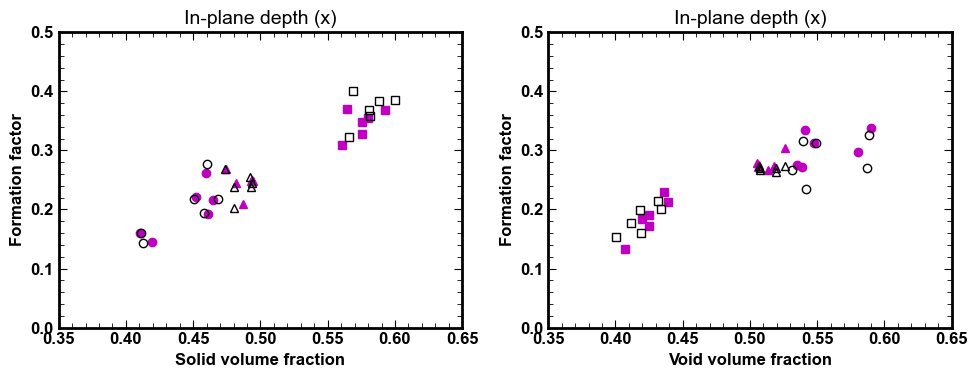

In [819]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

colors =['k','b','r']
shapes = ['^','o','s','v','>','<']

for b,bin in enumerate(formfactors):
    for s,sample in enumerate(bin):
        for r,region in enumerate(sample):
            if b==0:
                ax1.plot(total_volume_fractions[b][s][r],region, marker=shapes[s],markerfacecolor='none',zorder=100,
                         color='k', )
            if b==1:
                ax2.plot(total_volume_fractions[b][s][r],region,marker=shapes[s],markerfacecolor='none',zorder=100,
                         color='k',)

for s,sample in enumerate(total_IPw_vals_kf):
        for r,region in enumerate(sample):
            ax1.plot(total_IP_vals_vf[s][r],total_IP_vals_kf[s][r],' ',marker = shapes[s], color='m',)
            ax2.plot(IP_depth_void_vf[s][r],IP_depth_void_kf[s][r],' ',marker = shapes[s], color='m', )

            # ax1.plot(total_IPw_vals_vf[s][r],total_IPw_vals_kf[s][r],' ',marker = shapes[s], color='c')



ax1.set_xlabel("Solid volume fraction")
ax1.set_ylabel("Formation factor")

ax2.set_xlabel("Void volume fraction")
ax2.set_ylabel("Formation factor")

ax1.set_xlim([0.35, 0.65])
ax2.set_xlim([0.35, 0.65])

ax1.set_ylim([0, 0.5])
ax2.set_ylim([0, 0.5])

# ax.invert_xaxis()
# plt.tick_params(axis='x', which='minor')
ax1.set_title('In-plane depth (x)')
ax2.set_title('In-plane depth (x)')


# Water retention curves 9/6/2025 trying with updated geometry

In [820]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [ ]:
for s,sample in enumerate(pn_total[1]):
    for r,region in enumerate(sample):

        h = op.utils.check_network_health(region)
        op.topotools.trim(network=region, pores=h['disconnected_pores'])

        region['pore.diameter'] = region['pore.equivalent_diameter']
        region['throat.diameter'] = region['throat.equivalent_diameter']
        
        region.add_model(propname='throat.coords',model=op.models.geometry.throat_centroid.pore_coords)

        conduit_lengths = op.models.geometry.conduit_lengths.hybrid_cones_and_cylinders(region)
        region['throat.length'] = conduit_lengths[:,1]
        
        region.add_model(propname='throat.volume',model=op.models.geometry.throat_volume.cylinder)

        region.regenerate_models()


In [619]:
phases = []       
for s,sample in enumerate(pn_total[1]):
        sample_phases = []
        for r,region in enumerate(sample):
                phase = op.phase.Phase(network=region, name='phase_{}_{}'.format(s,r))
                phase['pore.contact_angle'] =  105
                phase['pore.surface_tension'] = 0.0626
                # phase['throat.contact_angle'] =  105
                # phase['throat.surface_tension'] = 0.0626

                # phase.add_model_collection(op.models.collections.phase.water)
                # phase.add_model_collection(op.models.collections.physics.basic)


                phase.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
                phase.regenerate_models()

                sample_phases.append(phase)
        phases.append(sample_phases)



In [620]:
print(phases[0][0]['throat.contact_angle'])
print(phases[0][0]['throat.surface_tension'])

[105. 105. 105. ... 105. 105. 105.]
[0.0626 0.0626 0.0626 ... 0.0626 0.0626 0.0626]


In [621]:
percs = []
drains = []
pressures = np.logspace(4,7,100)

for s,sample in enumerate(pn_total[1]):
    sample_percs = []
    sample_drains = []
    for r,region in enumerate(sample):

        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.InvasionPercolation(network=region,phase=phases[s][r]).reset()
        perc = op.algorithms.InvasionPercolation(network=region,phase=phases[s][r],name='perc_{}_{}'.format(s,r))
        perc.set_inlet_BC(pores = used_inlets)
        perc.run()


        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.Drainage(network=region,phase=phases[s][r]).reset()
        drain = op.algorithms.Drainage(network=region,phase=phases[s][r],name='drain_{}_{}'.format(s,r))
        drain.set_inlet_BC(pores = used_inlets)
        drain.run(pressures=pressures)

        sample_percs.append(perc)
        sample_drains.append(drain)
    percs.append(sample_percs)
    drains.append(sample_drains)

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

In [622]:
# region = pn_total[1][0][0]
# inlets = region.pores('ymax')
# used_inlets = [inlets[y] for y in range(0, len(inlets), 2)]

# region['pore.used_inlets'] = False
# region['pore.used_inlets'][used_inlets] = True
# print(region['pore.used_inlets'])

# op.visualization.plot_notebook(region,
#                                node_size=region['pore.diameter'],
#                                node_color=region['pore.used_inlets'],
#                                colormap='Reds',
#                                node_scale=2*10**8,
#                                edge_scale=0.0001
#                                )

In [623]:
perc_pcs = []
perc_sats = []
for s,sample in enumerate(percs):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    perc_pcs.append(sample_pcs)
    perc_sats.append(sample_sats)

In [624]:
drain_pcs = []
drain_sats = []
for s,sample in enumerate(drains):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    drain_pcs.append(sample_pcs)
    drain_sats.append(sample_sats)

In [625]:
print(drain_pcs[1][0])
print(len(drain_pcs[1][0]))

for region in drain_sats[1]:
    print(1-region[0])


[200923.3002565046, 231012.9700083158, 247707.6355991714, 265608.7782946684, 284803.5868435805, 305385.55088334123, 351119.17342151277, 376493.58067924716, 403701.72585965577, 432876.12810830615, 464158.8833612782, 497702.35643321136, 533669.9231206313, 572236.765935022, 613590.7273413176, 657933.2246575683, 705480.2310718645, 756463.3275546291, 811130.8307896872, 869749.0026177834, 932603.3468832199, 1000000.0, 1072267.222010323, 1149756.9953977356, 1232846.7394420658, 1321941.1484660287, 1417474.1629268047, 1519911.0829529332, 1629750.834620647, 1747528.4000076829, 1873817.4228603868, 2009233.0025650458, 2154434.6900318866, 2310129.700083158, 2477076.355991714, 2656087.782946684, 2848035.8684358047, 3053855.5088334125, 3274549.1628777315, 3511191.7342151273, 3764935.806792471, 4037017.2585965497, 4328761.281083061, 4977023.564332114, 5722367.65935022, 7054802.310718645, 10000000.0]
47
0.9864613244974803
0.9598280202358129
0.9508438223889933
0.8763508593289453
0.9796750511500726
0.988

In [626]:
#log normal std (same for diam or radius)
ln_sigma = np.array([0.6352,0.7396,0.6127])

#log normal mean (diam [nm])
ln_mu_diam = np.array([4.6565,4.9255,4.5715])
dm = np.exp(ln_mu_diam + (ln_sigma**2/2))*10**-9
print('Dm: ', dm)
print('Dm/2: ', dm/2)


ln_mu_rad = np.log(np.exp(ln_mu_diam)/2)
print('ln_mu_rad: ',ln_mu_rad)

rm = np.exp(ln_mu_rad + (ln_sigma**2/2))*10**-9
print('Rm: ',rm)


Dm:  [1.2880e-07 1.8109e-07 1.1665e-07]
Dm/2:  [6.4399e-08 9.0546e-08 5.8326e-08]
ln_mu_rad:  [3.9634 4.2324 3.8784]
Rm:  [6.4399e-08 9.0546e-08 5.8326e-08]


In [627]:
# print(perc_pcs)

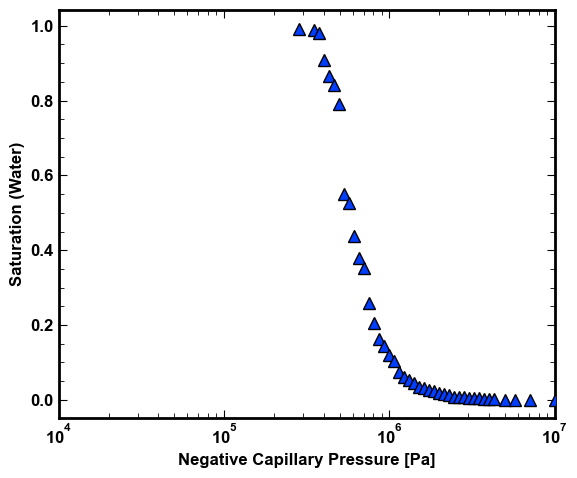

In [628]:
fig, ax = plt.subplots()

colors =sns.color_palette('bright',6)
shapes = ['^','o','s','v','>','<']
zorders = [100,99,98]



for s,sample in enumerate(drain_pcs):
    for r,region in enumerate(sample):
        if s==0 and r==0:
        # if True:
            # ax.plot(np.array(perc_pcs[s][r])*-1,1-np.array(perc_sats[s][r]),'-',color = colors[s],  
            #         markeredgewidth=0.5,zorder=zorders[s])
            ax.plot(drain_pcs[s][r],1-np.array(drain_sats[s][r]),linewidth=0,color = colors[s], marker = shapes[r], 
                    markeredgewidth=1,markersize=8,markeredgecolor='k', zorder=zorders[s])
            

pcap = np.logspace(4,7,100)*-1
gamma = 0.0626
theta = 75

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    # ax.plot(pcap*-1,s,color=line_colors[i], linewidth=4,zorder=200)

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
plt.tick_params(axis='x', which='minor')



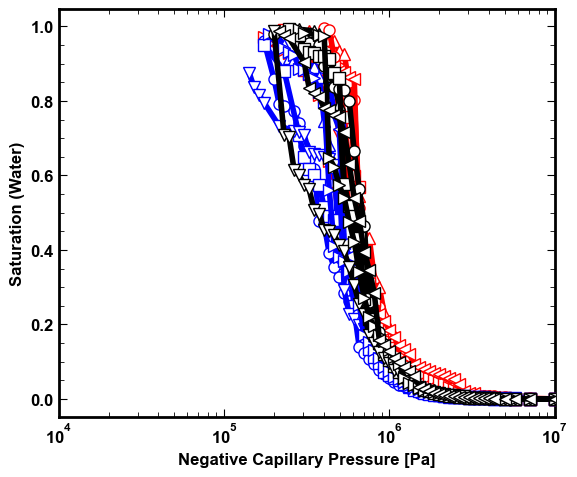

In [629]:
fig, ax = plt.subplots()

line_colors =['k','b','r']
shapes = ['^','o','s','v','>','<']
zorders = [100,99,98]

for s,sample in enumerate(drain_pcs):
    for r,region in enumerate(sample):
        # if s==0 and r==0:
        if True:
            # ax.plot(perc_pcs[s][r],1-np.array(perc_sats[s][r]),color = line_colors[s], marker = shapes[r], 
            #         markeredgewidth=0.5, markerfacecolor='white',zorder=zorders[s])
            ax.plot(drain_pcs[s][r],1-np.array(drain_sats[s][r]),linewidth=4,color = line_colors[s], marker = shapes[r], 
                    markeredgewidth=1,markersize=8, markerfacecolor='white',zorder=zorders[s])
            

pcap = np.logspace(4,7,100)*-1
gamma = 0.0626
theta = 75

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    # ax.plot(pcap*-1,s,color=line_colors[i], linewidth=4,zorder=200)

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
plt.tick_params(axis='x', which='minor')



In [630]:
#interpolation to average water retention curves for each sample across regions

x_interp = []
y_interp = []

x_all = []
f_avg = []

drain_pcs_cut = drain_pcs.copy()
drain_sats_cut = drain_sats.copy()

for s,sample in enumerate(drain_pcs_cut):
    sample_x_data = []
    sample_y_data = []
    sample_x_min_vals = []
    sample_x_max_vals = []
    sample_interp_funcs = []
    for r,region in enumerate(sample):
        sample_x_data.append(region)
        sample_y_data.append(drain_sats_cut[s][r])
        sample_x_max_vals.append(max(region))
        sample_x_min_vals.append(min(region))
        sample_interp_funcs.append(interp1d(region, drain_sats_cut[s][r]))
        
    x_max = math.floor(min(sample_x_max_vals))
    x_min = math.ceil(max(sample_x_min_vals))
    
    # define common carrier for calculation of average curve
    sample_x_all   = np.geomspace(x_min, x_max, num=50)
    
    sample_f_int = []
    for r,region in enumerate(sample):
        # evaluation of fits on common carrier
        sample_f_int.append(sample_interp_funcs[r](sample_x_all))
        
    # put all fits to one matrix for fast mean calculation
    data_collection = np.vstack(sample_f_int)

    # calculating mean value
    sample_f_avg = np.average(data_collection, axis=0)

    x_interp.append(sample_x_data)
    y_interp.append(sample_y_data)
    x_all.append(sample_x_all)
    f_avg.append(sample_f_avg)


Text(0.5, 1.0, 'Boundaries: ymax')

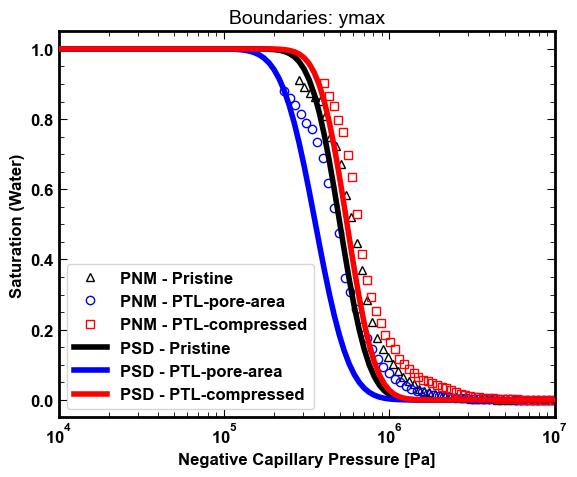

In [631]:
fig, ax = plt.subplots()

colors =['k','b','r']
shapes = ['^','o', 's']
labels = ['Pristine','PTL-pore-area','PTL-compressed']

for s,sample in enumerate(f_avg):
    ax.plot(x_all[s],1-np.array(f_avg[s]),' ',color=colors[s], marker=shapes[s], markerfacecolor='none',
            label='PNM - {}'.format(labels[s]))

pcap = np.logspace(4,7,100)*-1
gamma = 0.0626
theta = 75

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    ax.plot(pcap*-1,s,color=colors[i], linewidth=4,zorder=200,
            label='PSD - {}'.format(labels[i]))


ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
ax.legend()
plt.tick_params(axis='x', which='minor')
plt.title('Boundaries: ymax')



# Relative Permeability and Diffusivity - 9/6/25 new geometry

## edited 9/11/25

## Define helper functions

In [821]:
def sat_update(network, nwp, wp):
    """
        Calculates the saturation of NON-WETTING phase using occupancy information from ordinary percolation.
        Parameters
        ----------
        network: network
        nwp : phase
            non-wetting phase
        wp : phase
            wetting phase
    """
    pore_mask = nwp["pore.occupancy"] == 1
    throat_mask = nwp["throat.occupancy"] == 1
    sat_p = np.sum(network['pore.volume'][pore_mask])
    sat_t = np.sum(network['throat.volume'][throat_mask])
    sat1 = sat_p + sat_t
    bulk = network['pore.volume'].sum() + network['throat.volume'].sum()
    sat = sat1/bulk
    return sat

In [822]:
def Rate_calc_diff(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    Fd = op.algorithms.FickianDiffusion(network=network, phase=phase)
    Fd.settings._update({'conductance' : conductance})
    Fd.set_value_BC(pores=inlet, values=1)
    Fd.set_value_BC(pores=outlet, values=0)
    Fd.run()
    R = np.sum(np.abs(Fd.rate(pores=inlet, mode='group')))
    L = 1.2e-6
    A = 1.44e-12
    D_eff = R * (L) / (A) / (1)
    return D_eff

In [823]:
def Rate_calc_perm(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    St_p = op.algorithms.StokesFlow(network=network, phase=phase)
    St_p.settings._update({'conductance' : conductance})
    St_p.set_value_BC(pores=inlet, values=1)
    St_p.set_value_BC(pores=outlet, values=0)
    St_p.run()
    R = np.sum(np.abs(St_p.rate(pores=inlet, mode='group')))
    L = 1.2e-6
    A = 1.44e-12
    K_eff = R * phase['pore.viscosity'][0] * L / A / 1
    return K_eff

## Reinitialize pore networks 

In [842]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [855]:
# Geometry matching formation factor/taufactor

total_volumes = []
for s,sample in enumerate(pn_total[1]):
    sample_total_volumes = []
    for r,region in enumerate(sample):

        h = op.utils.check_network_health(region)
        op.topotools.trim(network=region, pores=h['disconnected_pores'])

        # # pore extended diameter best matches MIP water retention curve 
        region['pore.diameter'] = region['pore.extended_diameter'] 
        
        # # pore equivalent diameter best matches taufactor formation factor results
        # region['pore.diameter'] = region['pore.equivalent_diameter']

        region['throat.diameter'] = region['throat.inscribed_diameter']
        region['pore.volume'] = op.models.geometry.pore_volume.sphere(region,pore_diameter='pore.equivalent_diameter')

        region.add_model(propname='throat.coords',model=op.models.geometry.throat_centroid.pore_coords)
        region.add_model(propname='throat.diffusive_size_factors',model=op.models.geometry.diffusive_size_factors.hybrid_cones_and_cylinders)
        region.add_model(propname='throat.hydraulic_size_factors',model=op.models.geometry.hydraulic_size_factors.hybrid_cones_and_cylinders)

        region.add_model(propname='throat.length',model=op.models.geometry.throat_length.hybrid_cones_and_cylinders)
        region.add_model(propname='throat.volume',model=op.models.geometry.throat_volume.cylinder)
        

        region.regenerate_models()
        total_volume = np.sum(region['pore.volume']) + np.sum(region['throat.volume'])
        sample_total_volumes.append(total_volume)
    total_volumes.append(sample_total_volumes)


In [844]:
#calculate both phase volume fractions using the pore network 

# total_volume_fractions = []
# for s,sample in enumerate(total_volumes):
#     sample_volume_fractions = []
#     for r,region in enumerate(sample):
#         sample_volume_fractions.append(region/(region+total_volumes[(b+1)%2][s][r]))
#     total_volume_fractions.append(sample_volume_fractions)

# total_volume_fractions = np.array(total_volume_fractions)

# print(total_volume_fractions)
# print()


In [845]:
phases_nw = []
phases_w = []

for s,sample in enumerate(pn_total[1]):
    sample_phases_nw = []
    sample_phases_w = []

    for r,region in enumerate(sample):

        phase_nw = op.phase.Phase(network=region,name='phase_nw_{}_{}'.format(s,r))
        phase_nw['pore.surface_tension'] = 0.072
        phase_nw['pore.contact_angle'] =  100  
        phase_nw.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
        phase_nw['pore.diffusivity'] = 2.4e-9
        phase_nw['pore.viscosity'] = 20.55e-6
        phase_nw['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase_nw)
        phase_nw['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase_nw)
        phase_nw.regenerate_models()


        phase_w = op.phase.Phase(network=region,name='phase_w_{}_{}'.format(s,r))
        phase_w.add_model_collection(op.models.collections.phase.water)
        phase_w['pore.surface_tension'] = 0.072
        phase_w['throat.surface_tension'] = 0.072
        phase_w['pore.contact_angle'] =  80 
        phase_w['throat.contact_angle'] =  80 
        phase_w['pore.diffusivity'] =  1e-9 
        phase_w.regenerate_models()
        phase_w.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
        phase_w['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase_w)
        phase_w['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase_w)
        phase_w.regenerate_models()

        sample_phases_nw.append(phase_nw)
        sample_phases_w.append(phase_w)

    phases_nw.append(sample_phases_nw)
    phases_w.append(sample_phases_w)


[23:22:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=138833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=844182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=926148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=365292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=901534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=528573;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=832620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=214665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=963343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=422135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=123878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=516023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=530878;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=957787;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=840978;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=401960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=394704;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=800623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=386608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=803498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=486175;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=229052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=944066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=248327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=771219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=666948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=608538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=980145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=886701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=126715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=311514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=243428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=327949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=152396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=47791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=140114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=552807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=969208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=168761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=342732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=117563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=214833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=299678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=503927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=215853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=600428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=912872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=273043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=83656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=409256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=579382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=722910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=229476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=202034;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=618407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=21473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=86801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=942676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=712987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=483142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=769064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=650386;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=757798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=253280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=168314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=373436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=775101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=658566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=378445;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=122391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=863417;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=150952;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=746590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=509879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=486436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=500749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=41871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=560512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=738882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=549330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=972918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=664287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=645444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:22:16] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=619517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=535409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=991854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=367937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=219184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=642797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=986562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=601029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=402826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=359913;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=8194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=540928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=480435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=53363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=351558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=312635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=464359;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=991409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=900951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=614984;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=323846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=549081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=192762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=40317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=382011;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=904020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=925764;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=602813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=338572;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=615924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=598209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=971564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=276519;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=146691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=807659;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=601202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=819517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=915577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=496980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=670001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=611101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=919818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

In [846]:
diffs_sp_nwp = []
diffs_sp_wp = []
perms_sp_nwp = []
perms_sp_wp = []

for s,sample in enumerate(pn_total[1]):
    sample_diffs_sp_nwp = []
    sample_diffs_sp_wp = []
    sample_perms_sp_nwp = []
    sample_perms_sp_wp = []

    for r,region in enumerate(sample):

        inlet = region.pores('ymin')
        outlet = region.pores('ymax')
        
        diff_sp_nwp = Rate_calc_diff(region, phases_nw[s][r], inlet, outlet, conductance = 'throat.diffusive_conductance')
        diff_sp_wp = Rate_calc_diff(region, phases_w[s][r], inlet, outlet, conductance = 'throat.diffusive_conductance')

        perm_sp_nwp = Rate_calc_perm(region,phases_nw[s][r], inlet, outlet, conductance = 'throat.hydraulic_conductance')
        perm_sp_wp = Rate_calc_perm(region,phases_w[s][r], inlet, outlet, conductance = 'throat.hydraulic_conductance')

        sample_diffs_sp_nwp.append(diff_sp_nwp)
        sample_diffs_sp_wp.append(diff_sp_wp)
        sample_perms_sp_nwp.append(perm_sp_nwp)
        sample_perms_sp_wp.append(perm_sp_wp)
    diffs_sp_nwp.append(sample_diffs_sp_nwp)
    diffs_sp_wp.append(sample_diffs_sp_wp)
    perms_sp_nwp.append(sample_perms_sp_nwp)
    perms_sp_wp.append(sample_perms_sp_wp)
        

[23:22:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=868414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=830871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=800848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=435832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=608409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=2328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=6455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=904251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=732415;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=991972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=606173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=488339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=869080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=833771;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=308749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=324045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=637584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=348748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=72234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=273848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=88507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=460973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=99970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=632154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=136622;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=185594;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=553145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=204316;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=408275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=116260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=660784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=498204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=526618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=494504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=212083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=597778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=372194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=14111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=941654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=57408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=89782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=468394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=26847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=476315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=268656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=5323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=873743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=522899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=581277;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=851936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=642418;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=714464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=969896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=68095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=835851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=617475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=750684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=276227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=236830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=82468;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=676474;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=279217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=618473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=561323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=487755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=879131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=46178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=32600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=288188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=309853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=189761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=579849;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=271177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=208904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=443035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=91824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=375628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=92696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=865740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=930266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=691146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=191961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=525539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=903315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=484118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=855339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=693899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=393250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=69855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=993514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=286090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=145367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=921641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=896882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=735560;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=453191;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=66719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=860453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=641275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=198001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=922890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:22:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=210544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=331562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=159975;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=33017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=176248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=20679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=604703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=783946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=542352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=167844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=231401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=31456;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=488867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=311208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=413979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=699891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=184225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=11171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=632500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=239596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=75206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=848304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=657244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=426682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=930037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

In [847]:
print(np.array(perms_sp_nwp))
print(np.array(perms_sp_wp))
print(np.array(diffs_sp_nwp))
print(np.array(diffs_sp_wp))

print(total_volume_fractions[1])


[[3.9109e-17 2.8583e-17 4.2250e-17 1.9009e-16 8.8956e-17 3.0273e-17]
 [6.4875e-17 1.0941e-16 1.4033e-16 8.3173e-17 5.4743e-17 6.4868e-17]
 [1.7786e-17 1.5970e-17 1.4920e-17 1.9921e-17 3.4718e-17 2.0394e-17]]
[[3.9109e-17 2.8583e-17 4.2250e-17 1.9009e-16 8.8956e-17 3.0273e-17]
 [6.4875e-17 1.0941e-16 1.4033e-16 8.3173e-17 5.4743e-17 6.4868e-17]
 [1.7786e-17 1.5970e-17 1.4920e-17 1.9921e-17 3.4718e-17 2.0394e-17]]
[[4.6545e-10 4.6159e-10 5.1284e-10 6.0227e-10 5.6338e-10 4.1481e-10]
 [5.3253e-10 6.8146e-10 7.2428e-10 5.1128e-10 3.7616e-10 4.8468e-10]
 [2.5820e-10 2.6430e-10 2.5364e-10 3.5189e-10 2.8122e-10 2.9932e-10]]
[[1.9394e-10 1.9233e-10 2.1368e-10 2.5095e-10 2.3474e-10 1.7284e-10]
 [2.2189e-10 2.8394e-10 3.0178e-10 2.1303e-10 1.5673e-10 2.0195e-10]
 [1.0758e-10 1.1013e-10 1.0568e-10 1.4662e-10 1.1718e-10 1.2472e-10]]
[[0.5077 0.5073 0.5193 0.5261 0.5194 0.5066]
 [0.5494 0.5887 0.5871 0.5418 0.5395 0.5315]
 [0.4003 0.4316 0.419  0.4341 0.4186 0.4117]]


Text(0.5, 0, 'Porosity')

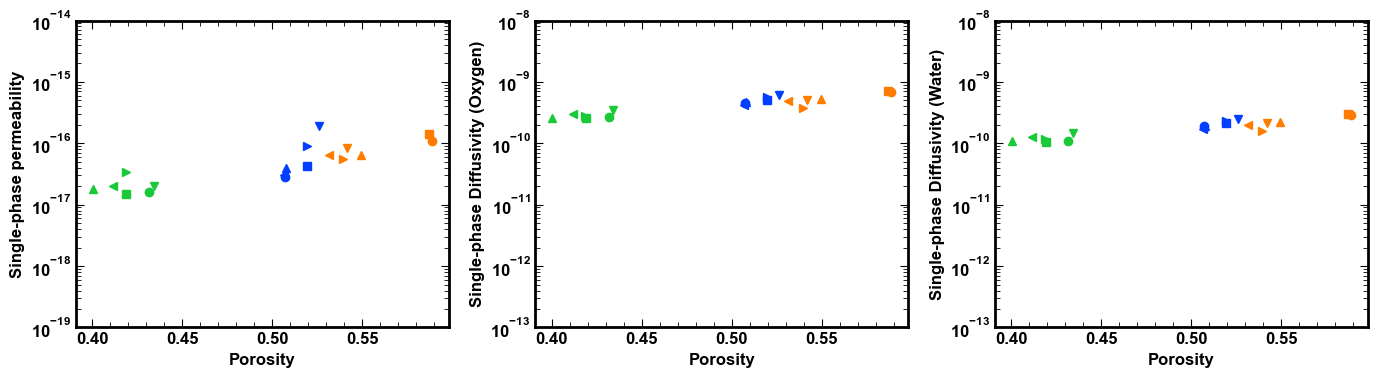

In [848]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
line_colors =['k','b','r']
markers = ['^','o','s','v','>','<']


for s,sample in enumerate(total_volume_fractions[1]):
    for r,region in enumerate(sample):
        ax1.plot(region,perms_sp_nwp[s][r],color=colors[s],marker=markers[r])
        ax2.plot(region,diffs_sp_nwp[s][r],color=colors[s],marker=markers[r])
        ax3.plot(region,diffs_sp_wp[s][r],color=colors[s],marker=markers[r])

# ax.legend()
ax1.set_yscale('log')
ax1.set_ylim(10**-19,10**-14)
ax1.set_ylabel('Single-phase permeability')
ax1.set_xlabel('Porosity')

ax2.set_yscale('log')
ax2.set_ylim(10**-13,10**-8)
ax2.set_ylabel('Single-phase Diffusivity (Oxygen)')
ax2.set_xlabel('Porosity')

ax3.set_yscale('log')
ax3.set_ylim(10**-13,10**-8)
ax3.set_ylabel('Single-phase Diffusivity (Water)')
ax3.set_xlabel('Porosity')




In [853]:
import mixed_invasion_percolation_KF as mip
import importlib
 
importlib.reload(mip)
from mixed_invasion_percolation_KF import MixedInvasionPercolation

drains = []

for s,sample in enumerate(pn_total[1]):
    sample_drains = []

    for r,region in enumerate(sample):
        inlet = region.pores('ymin')
        outlet = region.pores('ymax')
        op.algorithms.Drainage(network=region,phase=phases_nw[s][r]).reset()
        drain = op.algorithms.Drainage(network=region, phase=phases_nw[s][r])
        drain.set_inlet_BC(inlet)
        drain.run()

        # inlets = region.pores('ymin')
        # used_inlets = [inlets[y] for y in range(0, len(inlets), 2)]
        # MixedInvasionPercolation(network=region,phase=phases_w[s][r]).reset()
        # drain = MixedInvasionPercolation(network=region,phase=phases_w[s][r],
        #                                 # name='mip_{}_{}'.format(s,r)
        #                                 )
        # drain.setup(phase=phases_w[s][r])
        # drain.set_inlet_BC(pores = used_inlets)
        # drain.run()

        sample_drains.append(drain)
    drains.append(sample_drains)

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [854]:

Snwparrs = []

reldiffs_nwp = []
reldiffs_wp = []

relperms_nwp = []
relperms_wp = []


for s,sample in enumerate(pn_total[1]):

    sample_Snwparr = []

    sample_reldiff_nwp = []
    sample_reldiff_wp = []

    sample_relperm_nwp = []
    sample_relperm_wp = []

    for r,region in enumerate(sample):
        drn = drains[s][r]
        phase_nw = phases_nw[s][r]
        phase_w = phases_w[s][r]
        diff_sp_nwp = diffs_sp_nwp[s][r]
        diff_sp_wp = diffs_sp_wp[s][r]
        perm_sp_nwp = perms_sp_nwp[s][r]
        perm_sp_wp = perms_sp_wp[s][r]


        Snwparr = []

        reldiff_nwp = []
        reldiff_wp = []

        relperm_nwp = []
        relperm_wp = []

        inlet = region.pores('ymin')
        outlet = region.pores('ymax')

        for Pc in np.unique(drn['pore.invasion_pressure']):
            phase_nw['pore.occupancy'] = drn['pore.invasion_pressure'] < Pc
            phase_nw['throat.occupancy'] = drn['throat.invasion_pressure'] < Pc
            phase_w['pore.occupancy'] = 1 - phase_nw['pore.occupancy']
            phase_w['throat.occupancy'] = 1 - phase_nw['throat.occupancy']
            phase_nw.regenerate_models()
            phase_w.regenerate_models()
            sat_point = sat_update(region,phase_nw,phase_w)
            Snwparr.append(sat_point)

            model_mp_cond = op.models.physics.multiphase.conduit_conductance
            phase_nw.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
                        throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
            phase_w.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
                        throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
            phase_nw.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
                        throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
            phase_w.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
                        throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
            phase_nw.regenerate_models()
            phase_w.regenerate_models()

            Rate_mult_nwp = Rate_calc_diff(region, phase_nw, inlet, outlet, conductance = 'throat.conduit_diffusive_conductance')
            Rate_mult_wp = Rate_calc_diff(region, phase_w, inlet, outlet, conductance = 'throat.conduit_diffusive_conductance')
            reldiff_nwp.append(Rate_mult_nwp/diff_sp_nwp)
            reldiff_wp.append(Rate_mult_wp/diff_sp_wp)


            Rate_p_mult_nwp = Rate_calc_perm(region, phase_nw, inlet, outlet, conductance = 'throat.conduit_hydraulic_conductance')
            Rate_p_mult_wp = Rate_calc_perm(region, phase_w, inlet, outlet, conductance = 'throat.conduit_hydraulic_conductance')
            relperm_nwp.append(Rate_p_mult_nwp/perm_sp_nwp)
            relperm_wp.append(Rate_p_mult_wp/perm_sp_wp)

        sample_Snwparr.append(Snwparr)

        sample_reldiff_nwp.append(reldiff_nwp)
        sample_reldiff_wp.append(reldiff_wp)

        sample_relperm_nwp.append(relperm_nwp)
        sample_relperm_wp.append(relperm_wp)


    Snwparrs.append(sample_Snwparr)

    reldiffs_nwp.append(sample_reldiff_nwp)
    reldiffs_wp.append(sample_reldiff_wp)

    relperms_nwp.append(sample_relperm_nwp)
    relperms_wp.append(sample_relperm_wp)


[23:47:52] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=808519;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=177456;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=708335;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=111171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=444111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=14817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=880189;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=995472;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=110157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=266766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=914032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=722193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=251479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=452206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=378464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=225216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=518603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=940690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=529933;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=812813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=923863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=349092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=7352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=669003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=248041;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:47:53] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=608010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=339211;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=609303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=310194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=964868;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=119398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=10547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=87429;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=963897;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=343182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=339202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=465891;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=195818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=314573;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=507577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=264399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=7717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=928172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=577215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=716001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=170675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=348103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=329920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=307820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=209048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=83509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=479544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=938645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=412930;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=671122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=255131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=104915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=487611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=726245;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=774605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=613514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=519154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:47:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=563497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=444039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=476217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=604999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=133469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=124944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=344869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=122963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=465912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=845103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=102691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=896396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=229642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=502740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=30862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=86166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=130364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=28988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914211;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=745212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198009;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=742960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=972074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=282310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=512214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482578;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=297460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=321273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=516151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:47:55] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=12490;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=440381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=328624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=755621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=119066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=250227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=374322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=163135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885543;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=737072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=400624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=651608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=614676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=330926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=781547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=262044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=713505;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=903395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=772046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=346802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=133197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=31906;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=55532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=846220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=228370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=249109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=36183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=608252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=905085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:47:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=297859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=469215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=169955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=120270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=775179;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=645877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=688077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=504062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=785313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=72058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=939782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=476267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=116244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=933057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=561629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=519923;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=253572;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=827135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=222756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=311379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=811123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=429405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=737996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=867339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=925675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718349;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=473801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=528996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=969945;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=968937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:47:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=576002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=872445;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=732566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=18570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=711176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=407205;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=97727;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=953631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=186306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=235950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=108002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=218345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=894330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=967133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=103930;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=39254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=541681;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=882691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=673388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499689;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=580336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=337803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=386407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=170106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=114781;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:47:58] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=660541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=219071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=72917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=738607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=741946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=236283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=955086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=353174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=593999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=216453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=535826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=77866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=343285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=112048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=258592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=850865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=94784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=586708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=947276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=235614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=197792;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=682315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=716385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=642314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=185301;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=76040;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=163693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=642556;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=743685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=344582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=648001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=915046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=878775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=395439;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=806865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=33398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:47:59] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=802602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=636858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=769149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=700749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=113805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=387801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=495993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=389453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=679089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=913516;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=807637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=238860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=994711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=68786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=428134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=900958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=954132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=896001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766006;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=642118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=958012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997747;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=467244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=322635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=582336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=482894;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=616838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=236416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=568059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=831557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=239072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=625933;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=39909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=959243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=122174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=82256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=513989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=236371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=965712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=279685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=788086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=177121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=287428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=239977;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=859240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584688;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=669289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=452794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=243492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=646690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=403565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=732098;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=419715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=543959;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=295437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=250829;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=634841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=762965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=404499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=34871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=122778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=658941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=548224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=370926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:01] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=254339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=360317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=960452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=966841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=764374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=875813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=181854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=672531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=438343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=591836;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=676426;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=524065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=664008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=173305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=188630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=258838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=221451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=418293;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=854828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=777289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=458142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=375260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=61668;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=597027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=57686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=636703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=917582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=662028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=33188;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=96057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=598361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=799715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=621710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=473654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=947008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=534494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=202308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=164176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=532928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=315072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=78735;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=222559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=350675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=218679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=381425;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=823421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=515417;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=966926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=943553;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=742069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=753910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856717;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=466477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=804086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=366184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=838035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=876541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=660083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=924326;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=202168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=315545;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=620944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=360916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=177090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=934758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=194498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=753842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=915771;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=128412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=145469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=805936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=860252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=661404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=479760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=736805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938694;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=240251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=449077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=470555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=327724;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=225152;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=556092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=849471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=473040;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=950008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=196919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=337724;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=222433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=911424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=334772;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=870393;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=526723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=422720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16693;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=36834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=618375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=603492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=4672;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=930664;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=313427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=250042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=644421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=252482;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321998;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=419058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=409861;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=355000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=168755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=44639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=581430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=504654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=279968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=21331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=171181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=978562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=636982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=390976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=993647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=890061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=440967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=168278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=528001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=889267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=15270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566785;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=890710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=596262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=398988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=804736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=989599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=492089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982222;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=219047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=360147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=102712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=76448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=868666;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=474438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=547405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=186587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=233496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=266790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=857332;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=98388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=49106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=725135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=12961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=162654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=844302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=712615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=547880;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=372712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=270462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=659607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=437116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=89833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=851620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=960357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=83820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=550476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=131778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=63216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=43089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=981373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=473438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=785751;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=281859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=705083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=125871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=398084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=406016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=449831;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=547141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=887370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=772255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=56410;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=180194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=440555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=346112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=359768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=973695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=8217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=564750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=611230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=968877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=358423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=135589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=943972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=713461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=645532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=682947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=314310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=225397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=353703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=721092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=310423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=373688;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=75625;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=238546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=854535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=343488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=459130;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=320098;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=440271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=296495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=930494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=458708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=563615;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=428112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=855161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=947608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=315986;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=932444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=682194;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=854864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=896301;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=477574;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=375094;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=845977;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=265853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=944148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=765932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=556372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=62899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=432980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=244212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=715470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=672411;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=767022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=115170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=460810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=573044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=192511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=107921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=384409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=452158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=3619;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=563370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=979737;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=697746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=2977;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=583206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=903730;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=964730;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=320471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=513376;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=927438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=998049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=644412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=827133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=349251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=293467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=5808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=469086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=439846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=818641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=683089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=360130;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=557901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=74037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=189419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=419508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=835512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=252366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=630304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=97129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=633865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=761239;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=147844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=808688;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=862244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=280025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=391139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=367478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=636146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=537336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=487948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=110534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=102953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=442585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=93591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=589376;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=596203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=395078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=546972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=330244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=83507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=53146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=633201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=860947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=449273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=153839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=357731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=848905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=282860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=584798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=23520;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=288925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=373561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=863965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=309765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=89086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=542589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=83323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=894649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=281705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=193037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=782798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=271043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=206129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=658934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=852530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=522954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=974246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=649686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=691181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=987500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=144524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=907013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=675594;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=314577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=311415;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=271634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=650339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=869191;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=245062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=366583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=157978;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=588658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=283399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=194076;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=478719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=287368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=931419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=88562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=933898;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=329586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=514156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=590750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=3307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=292212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=39469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=551159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=31582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=607405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=167715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=771899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=965944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=796048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=118640;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=510567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=750446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=237804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=968729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=778408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=104113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=656611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=932264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=940371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=264686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=511655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=351499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=718613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=396024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=697550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=759943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=770409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=193337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=548488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=226458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=170309;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=296273;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=55055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=427023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=148525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=685437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=301775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=789090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=200345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=595905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=100284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=102052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=949184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=487741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=576056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=936650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=219060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=318914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=258042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=537594;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=730822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=688715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=392746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=263178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=691791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=750944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=928318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=382612;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=707914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=750322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=775068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=418963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=880071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=992865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=370485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=177252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=575332;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=463337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=118491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=981296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=843067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=850966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=635333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=675329;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=91660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=302073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=498058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=170941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=714834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=127826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=935899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=403397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=111569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=415416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=729840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=381682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=936516;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=427427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=933687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=963940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=272213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=332734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=439726;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=184561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=404703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=895167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=84128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=803045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=588611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=346440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=917027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=977131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=927960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=846138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=376715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=391218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=34834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=248182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=703706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=649771;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=522634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=149333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=431640;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=486521;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=91979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=705099;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=611847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=157647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=882650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=841815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=203116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=794480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=866812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=887351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=446797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=790535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=280080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=726957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=665605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=19402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=548049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=2365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=632882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=558138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=125167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=842471;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379787;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=416213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=914051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=473970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=669021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=164869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=787541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=647448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=927816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=929408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=497423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=536394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=214966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=241893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=827170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=367820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=906845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=818624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=43639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=890947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=400970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=693325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=876739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=860671;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=55294;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=127403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=842684;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=943465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=638921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=9725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=313231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=851580;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=425943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=464929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=32938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=470558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=820540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=418036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=672844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31096;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=11948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=200523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=952049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=319229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=388708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=323238;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=499164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=376100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=847634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=312118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=895204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=205458;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=569547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=663508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=888100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=636241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=101578;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=867678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=373024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=953104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=616454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=867558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=744700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=182936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=153724;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=368423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=978999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=751739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=758487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=579200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=923218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=455863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=209690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277773;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=178251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=596351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=661915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=305656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=634611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=728953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=248675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=922151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=848257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=716791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=972543;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=36568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=70062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=882433;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=468754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=950176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=326243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=575548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=762840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=779037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=646413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=549264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=417529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=314460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=303101;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=93690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=793827;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=586912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=826821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=38652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=660352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=227072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=362446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=767539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=102394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=324054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=722560;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=761948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=293804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=569149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=566707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=245785;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=333745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=551646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=866012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=301793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=612591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=393400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291192;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=306589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=438385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=633611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=824229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=734758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=855991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=299838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=573971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=255209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=369038;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=85240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=536748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=574874;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=860022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=410744;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=148112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=822875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=918890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=405220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101827;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=183991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=608084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=237840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=972541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=5121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=921596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=54716;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=790870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=580999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=713294;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837481;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=877925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=470409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=944171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=202322;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=981535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=473558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=426784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=100692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=248986;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=700755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=510440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=702220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=351537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=581803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=998793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=139832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=545850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=373499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=840199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=645038;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=810862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:48:32] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=165021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=511079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=907742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=256632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=597981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=449657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=587016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=954555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=672928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=568822;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=438413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=484930;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=58875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=150;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=230707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791849;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=451049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=919462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=299004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=21066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=383221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=864149;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=974914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=367579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=14045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=82114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=476964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=31051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=97709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=846671;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=685060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=197893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=565833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=936223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=285039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=92087;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=444986;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=552151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=935775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=974571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=43886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489630;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=232072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=886517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=938943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=597030;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=428059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=531971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=728331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=345892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=273552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=419454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=770730;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=631170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=723520;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=345481;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=565296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=787586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=421401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=414780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=450956;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=753551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=699396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=924048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329885;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=696921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=218663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=57970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=651302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=95825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=576637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=995565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=568170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=428270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=580340;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=896404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=422108;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=409651;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=63529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=576228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=350991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=399736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=403755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=738249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=65790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=582468;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=324719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=847933;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=50920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=646475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=221898;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=121196;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:48:37] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=856714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=612230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=545585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=345527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=737228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=746994;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=931512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=571429;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=933305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=990875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436526;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=760762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=394937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=613086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=679931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=590916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=810731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=211757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=764529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=560352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=427476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=977690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=616270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=543242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=3960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=870297;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=189105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:38] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=652608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566375;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=544299;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=465523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=685399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=613478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=773487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=495802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=888871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=341448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=871803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=543748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=954017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=807452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=101256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=812320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=553096;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=975639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=751328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=488008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=79587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=531317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:39] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=27238;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=182033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=737246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=72983;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=699197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=713691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=27063;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=198714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=272710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=77060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=608050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=395263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=755896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=681285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=585928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=10563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=598856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53153;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=145145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=131275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=289460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609671;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:40] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=852260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=700402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=291042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=258967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=974954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=529394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=126576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=297757;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=231255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=674476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=420845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=225544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=103786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=383524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=165180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=741890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:41] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=766254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=696000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=432396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888910;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=838815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=224679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=533394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=872582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=912931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=746840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=309016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=310753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=547948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=999540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=801012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=312076;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=679827;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=952807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=338990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=26161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=452681;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=638062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:42] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=337291;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=565883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=164020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=901582;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=410970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=162996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=492515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=182588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=797944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=694985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=544330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=662990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=69614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=315678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=390053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=669950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=609031;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=171411;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=958312;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888014;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=475399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=463395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:43] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=615510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=640274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=653217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=894544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=834185;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=118817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=326603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=632527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=891333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=738372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=835732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=982155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=521119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=967631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=192102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=965562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=204134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=844378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=532067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=611099;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=93436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=624469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=737297;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=38065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=42331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=21290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:44] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=509977;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=355520;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=528754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=427432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=100132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=660981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=613540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=517699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=999339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=960699;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=964046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=543773;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=314644;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=264662;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=979424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=122951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=674258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=444387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=24075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=20632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=905896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:45] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=416352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=24875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=96704;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=872321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=517904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=230848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=292575;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=416372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=417341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=165361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=381556;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:46] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=401639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=986996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=359401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=386601;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:47] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=816477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=786895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=801016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=627146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=116547;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=525260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=850825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=498679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=944313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=255127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=409753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=389978;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=589362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=847915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=171531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=575493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=557453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=585372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=371367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=829675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=543926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=914348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=957829;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=801490;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=820021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=421493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=620288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:48] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=502707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=617800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=347644;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=848899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899698;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=2916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=673068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=102835;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=29599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=831611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=71804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=680205;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=627013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=715557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=446206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=266750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=937888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=72737;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:49] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=948478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=524339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364947;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=793044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=235576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=676991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=573210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=691875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=87045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=358039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=224088;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=773550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=812157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=122224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=413429;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=375667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=310509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=793913;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=560526;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=150992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=726428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=428705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=592270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:50] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=915649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=486808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=465117;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=926501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=283533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=374247;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=415558;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=448596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=847593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=923589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=153509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=821151;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=862145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=59742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=363017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=245326;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=713528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=944528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=272061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:51] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=633848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=295549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=725097;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=411274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=925676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=202490;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=576345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=380900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=688916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=262874;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=221855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=674932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=818903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=880548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=848599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=796593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=752079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=329804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=49190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=709203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=320625;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=60796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=599009;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:52] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=888828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=209250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=127538;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=459497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=624781;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=547426;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=473613;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=237903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=177817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=119728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=567356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=451855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=64855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=480520;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=136484;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451542;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=380040;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=248398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=411176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=834736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=858386;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=217500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=275200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=729911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:53] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=590480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=559249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=85799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=881496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=460607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=988633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=155778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=586774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=673807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=177412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=112460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=933135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=973809;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=688525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=231534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=769917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=738762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=444397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=988690;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=49673;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570698;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=192228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=114122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=666160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=765670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=616697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=683494;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=788643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=755460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=363232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=153527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=25570;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=490838;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=319212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=347628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=466060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=551382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=147209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=413416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=661493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=30010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=295515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482778;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:55] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=622504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=563288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=882385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=664480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=144425;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=151279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=716663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=13924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=632855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=253086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=505621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=92166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=206023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=829444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=30812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=528626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=207437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=859076;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=550967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=560636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735959;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=52807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=569837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=325227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=723378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=621626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=614954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=626019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=703200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=940321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=878397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=225418;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=217606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=769183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=246715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=709971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=426451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69319;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=483871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=168949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=101546;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=981618;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=528173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=494961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=54290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=325327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=315555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=211714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=641515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=209027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997730;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:48:58] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=95238;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=469417;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=398233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=496113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=77767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=85286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=882067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=833202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=325806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=604287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=979503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=22497;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=710469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=260721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=683378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=707649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=971168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:48:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=594158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=729171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=987604;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=957949;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=598917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=576733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=557473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=205924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=734013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=100657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=198631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=655492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=808463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=957195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=847858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962072;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=631851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=671987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=667172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46532;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=942152;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=3441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=880380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=643228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=951592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=406430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=44796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=962442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=152226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=805530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=11144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=442008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=358226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=432972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=870095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=520805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=619692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=863818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=72118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=581588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=86180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=674389;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=970828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=90370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=579914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=199212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:01] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=873679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=323797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=736591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=716432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=880627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=549587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=126413;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=965957;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=582111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=742143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=754223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=138146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=420473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=26623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=587003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=397233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=931369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=316719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=658226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=869810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=526631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=280344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=550489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=300943;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=643825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=669824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=610164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=638115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=505086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=725090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=969423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=910166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=22247;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=846313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=328236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=707087;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=401915;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=771198;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=24076;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=668729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=681114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=255346;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=542389;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=808993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=384197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=646863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=202071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=203999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=75009;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=739414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=106446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=562697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=115892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=403039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=410782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=880315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=770086;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=959345;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=553249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=395513;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=790997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=635775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=879590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=370734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=984964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=935104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=784416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=333001;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=539876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=658358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=334400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=599999;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=621966;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=498171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=566255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=301358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=317779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=102419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=162823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=468129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=850394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=646229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=678616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=995401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=379130;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=490832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=408665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=793310;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=396993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=967052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=681404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=480587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=576914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=249865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=196671;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=89504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=287629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=683847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=250462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=38179;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=298730;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=669047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=226889;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=964065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=38846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=171973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=67626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=56511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=67191;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=94066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=707935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=382890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=825106;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=936902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=963848;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=373215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=302718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=549042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=16707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=646716;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=690901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651880;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=538873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=803886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=298960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=477427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=40541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=637535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=323300;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=646566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=683540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=787387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=945080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=45675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=655779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=521724;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=301811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=771391;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=227496;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=134511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=591055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=134304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=259500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=542305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=262515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=904045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=955988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=78451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=364033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=206327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=897046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=839100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=909195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=857591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284617;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=325162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=477872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=636005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=696929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=514024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379185;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=19334;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=299774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=577752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=282654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=14162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=704064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=832908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=289220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=892914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=248802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=66504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893553;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=380614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=232495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=811719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=103517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=115841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=611477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=18131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46789;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=507173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=60791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=953951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=232068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=944395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=532537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=116731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=434828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=815011;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=111164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=704384;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=173739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=703423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906094;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=133888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=412074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=816255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=8676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=140627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=78725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=550364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=985233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=311431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=175691;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=74465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=409981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=384406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=353271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=597721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=999962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=957423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=463277;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=587598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=279244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=268707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=620358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=226465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=921231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=714921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=271997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=29720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=467083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=967328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=834050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=83634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=51604;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=173918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=464919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=587919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=57055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=1144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=277170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=362380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=572318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=826383;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=312893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=137283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=396875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=581583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=480216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=349029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196373;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=870955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=255374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=431508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=280120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=56648;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=423550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=585863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=597251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=801973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732328;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=418195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=439883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=962296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=456620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=750846;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=850437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=626412;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=618180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=377090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=170641;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=647525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=97617;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=363725;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=449455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=940346;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=850493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=210336;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=144706;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=451290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=2649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=787492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=861102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=998722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=665405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=345632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=215675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=116732;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=454198;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=49996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=237528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=737155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=869834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=507164;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=655274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=186008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=92078;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=4798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=745295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=829059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=353676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=482865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=124377;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=524116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=484628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=677219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=871830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=104793;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=205745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=184119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=107408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=633421;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=667348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=916866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=898012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=795419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=587253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=90485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=755109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=664771;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=232286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=90854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=953802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=730209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=150351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=932529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=185872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=969664;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=672131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=140701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=839331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=175103;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=986483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=296536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=406470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=317476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=71125;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=351441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=168895;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=3603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=565158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=156099;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=728552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=223112;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=712374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=294249;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=682071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=530936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=405229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=880589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=209759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=440901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=330729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=221478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=837081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=157276;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=316519;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=57159;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=722912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=332047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=810450;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=268170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=630499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=421896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=756585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=887378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=243028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=351131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=172298;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=932118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=890844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=899565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455820;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=284371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=802760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=15311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=684286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=711452;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982211;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=745560;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=932637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=865207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=987511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=435365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=722050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=434932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=996864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:18] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=879168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=887971;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=683343;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=681026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=659141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=247801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=736113;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=580517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=542445;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=160246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=148847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=659979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=881839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=898744;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781437;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=394938;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=316485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=427027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=882698;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=941721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=91865;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=173493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=969650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=148660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=835351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=276533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=813861;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=870170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=469257;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=111576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=725315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=665067;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=665862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=177488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=842749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=327223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=994253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651889;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:49:20] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=84609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=997221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=987478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=636253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=376214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=73798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=136700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=446394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=347392;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=108144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=619886;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=560756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=52505;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=871794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=238298;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=649746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=438598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=411627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958030;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=808351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=623048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=755639;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=727620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=135916;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=478567;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=675928;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=543817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=839499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=717271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=281195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=731296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=272010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=903061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=237016;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=764674;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=655255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701767;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=447859;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=775585;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=448092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=652436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=533213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=119919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=860133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=700792;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847842;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=932997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=383073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364399;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=300588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=565069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=291710;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=963081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=125873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:49:23] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=829559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=976200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=797321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=394719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=626611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=263850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=357461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=713899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=217816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=532692;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=457034;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=634271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=591843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=465721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=236302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=716065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=847803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=934383;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=875578;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=671974;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=741782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201038;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=84633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=446833;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=760901;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=654058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=434851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=980023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=400576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=625407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=235491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=594849;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=352773;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=43832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=682183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=216907;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=659711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=620486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=659357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=105392;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=962195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=24387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=375462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=74617;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=864981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=742761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=792679;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=375798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=754604;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=8759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=23232;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=930718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=452581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=17876;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=265077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=944685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=766091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=89955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=819784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=654266;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=178748;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=236000;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=379894;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=668739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=610178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=288720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=632403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=728278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=313362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=622905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=684015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=376569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=803274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=81190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=928370;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=872588;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=215854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=160075;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=468880;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=140362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=861460;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167286;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=866721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=24125;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=54274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=153046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=228227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=18216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=769069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=836218;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=147004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=794745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=834020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=574256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=415504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=665637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=542739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=671509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=793786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=21890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=904295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=337093;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=975401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=108465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=379495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=635501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=236575;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=20853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=34902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=166632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=195883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=254330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=907092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=139146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=578504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=57645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=631735;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=839132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=848314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=616592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=645264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=773161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504553;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=641801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=279772;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=974557;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=724559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=95401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=914522;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=256763;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=328260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=940330;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=815428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=336990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=447746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=683182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=792531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=325656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=521389;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=640705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504004;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=412272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=4519;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=119056;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=777954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=909708;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=972168;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=34476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=953404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=120975;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504898;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=881744;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=558044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=480379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455627;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=233158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=594005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=617908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=698177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=44583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=442363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=404045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=673037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=41296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=84351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=138318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=663927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=144303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=618398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=850275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=898356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=529925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=944347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=846136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=472354;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=412005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=922937;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=108435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=122177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=945611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=304021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=483720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=285889;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=30577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=577127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=889743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=694551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=11079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609781;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=225873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=477954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=277274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=288828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=126806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=321098;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=209672;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=92788;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=965242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=317587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=41548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732636;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=817829;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=306381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=387666;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=392380;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=187960;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=953959;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=44608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=847018;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=422576;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=801265;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=87161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=509077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=27498;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=516435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=293405;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=280307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=161634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=340025;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=652562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=190619;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=603481;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=137953;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=494733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=129256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=211689;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=818461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=238217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=4828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=450850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=253143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=489235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=925647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=254534;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=727847;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289896;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=287335;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=711346;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=455611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=533892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=919349;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=993334;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=470962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=250092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=457934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=696320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=961917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=346145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=413137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=618295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=498007;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=890057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=624403;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=894102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=879805;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=538892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=597862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=75695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=707290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=199974;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=81126;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:36] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=826181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=358902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=886301;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441024;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=182045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=484720;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=350261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=726145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=779043;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=660288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=171678;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=511676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=870866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=834874;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=777182;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=887723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=632414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=953500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=440061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=53995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=130295;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:37] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=551364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=685376;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=145382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=628064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=707275;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=173548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=433701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=214608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=580881;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=941431;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=386934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=31940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=776930;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=402521;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=325449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=92436;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=365206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=283902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:38] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=242739;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=91477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=410148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=151749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=658579;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=177179;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=395818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=750668;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=665635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=637240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=358216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=998493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=590131;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=14111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=349595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=525899;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=796894;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=534352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=609365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=346448;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=692600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983269;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=423656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=293734;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:39] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=683012;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=898674;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=407362;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=894279;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=864701;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=268918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=64611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=727742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=905795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=259626;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=227172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=229135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=262912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=198242;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=551650;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=444357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=505703;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=488290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:40] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=995518;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=993241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=670992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=627758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=971225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=485089;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=992655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=726476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=884917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441167;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=396934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=623224;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=141311;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=692095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=3464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=184781;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=97951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=719770;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=442125;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=4268;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=396109;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=778751;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:41] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=273964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=365432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=514758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=673470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=221604;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=448339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=273877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=573921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=119202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=179934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=50017;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=762752;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=805661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466160;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=525829;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=788653;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=203603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=200063;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:42] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=67932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=443959;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=296313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=327382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=59091;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897358;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=487533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=329277;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=321235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=981127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220840;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=53589;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=81541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=137920;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=317139;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=12635;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:43] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=580410;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559339;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=342565;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=595116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=842658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=494624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=578237;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=895414;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=924944;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=119884;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=852504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=157281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=583369;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=873133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=925740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=620503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=38302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=536120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=532201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=256908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=863979;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=252400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=249156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=683235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:44] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=722141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=290863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=850378;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=238493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=87988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=714981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=761619;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=860186;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=98147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=383614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=524102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=90798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=494592;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=92183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=699059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=378500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=865785;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=462045;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=734355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:49:45] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=974660;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=725359;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=533092;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=310366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=434284;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=946825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=675919;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=8987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=631540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=851760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=639728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=185912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=201974;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731807;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=344686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=652100;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=275997;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=473853;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=464060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=141936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=944070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=135278;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:46] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=640453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=111223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=704479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=231170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=412568;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=278935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=912836;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863416;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=290900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541415;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=950902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=511782;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=534573;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=15954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=190663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=417438;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=271549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=585584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=216936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=882090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:47] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=472954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=152317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=819824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=190652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=420741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837642;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=801587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=648144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=495837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=299922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=798970;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=691121;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=334845;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=457298;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=888146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=239974;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=144486;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=581477;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:48] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=827008;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=421248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=820251;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=815936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=636864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=269774;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=414909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=525084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=684202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=473029;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=359059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=55470;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=203165;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=659073;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=805988;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=663174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=267454;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=725055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=760661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:49] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=751620;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937619;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=425810;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=669379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=878584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=902637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=779607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=529505;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=831823;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=428299;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=814777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=455062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=465934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=747851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=666824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=249863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=688877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=528779;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=758261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=338909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=254119;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=824550;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=571817;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:50] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=488517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=445128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=895280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=59090;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=560808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=54053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=959745;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461161;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=91190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931201;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=20903;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=772080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=46150;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=976110;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=619051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=411851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=631760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=102969;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=373569;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=198712;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=737133;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:49:51] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=326824;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=850398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=987652;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=194217;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=848587;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=703698;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=677851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=152680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=492371;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=905562;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=149214;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=599729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=683141;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=368743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=708675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=784023;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=955687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=323351;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=29634;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559350;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=322079;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=556888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62529;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=883423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=911904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:52] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=977323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=421593;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=905368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=877503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=264904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=334461;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=55481;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=406236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=48070;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=249869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=302209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=324583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=557381;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=759723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=145203;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=946262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=667384;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=107934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=137765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=784518;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=57733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=500561;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:53] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=808816;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=347504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=218740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=576397;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=220718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=604027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931097;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=123331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546977;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=571813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=707936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=364409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=909424;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=943503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=471864;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=681035;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=52501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=223965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=168890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=94760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=983541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=999252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:54] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=739419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=689733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=838873;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=302027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=891655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=365402;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=720675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=810714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=788511;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=852244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=239788;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=510185;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=900442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=835264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=367736;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=862294;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=925453;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=328147;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:55] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=746172;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=504524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=824233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=840765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=612499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=454917;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=150580;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=95633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53884;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=466707;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=82021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=227039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=143606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=654049;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=57435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=678875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=964406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=379606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=353548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=760629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=336406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=799536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584360;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=246671;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=158872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=152900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=224364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=996202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=383932;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=804230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=79341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=518487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=798163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=445514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=556226;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732320;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=946464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=823292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=167687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=309120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=553005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=759686;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=492831;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=18964;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=449790;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=321697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=251074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=469506;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=312602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=530967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=920227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=271967;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731046;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=587150;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=945991;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=209428;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=877762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=679258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=389446;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=706352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=55315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=587661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=198195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=150981;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62248;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=45464;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:49:58] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=356852;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=100176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=913535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=993658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=680052;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=538940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=786751;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=810798;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=259250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=381628;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=380283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=376596;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=869401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=546181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=377015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=881768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=749228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=669476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=770942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=17914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=426355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:49:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=101614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633060;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=496806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=427019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=132528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=217270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=75801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441233;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=827177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=260728;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=773152;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=975939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=96871;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=403451;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=227753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=274776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=169794;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=687138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=297571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=425515;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=773544;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=85065;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=370523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=970061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:00] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=412514;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=659235;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=108479;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=412289;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=523499;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=849382;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=740440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=394297;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=993606;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=578647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=727780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=653524;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=940808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=636892;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=56533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=872786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=614675;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=723469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=884084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=774307;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=583068;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=557551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:01] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=292590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=236647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=871019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=523633;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668528;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=888265;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=98841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=562200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=521761;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=37187;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=171225;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=589292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847715;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=250287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=599682;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=325374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=685531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=945733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=527649;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=465624;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858801;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:02] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=951508;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=916696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=772055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=418762;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=776489;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=683914;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240427;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=515598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=617754;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69647;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=647177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=50324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=373517;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=331222;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=757493;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196808;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=983476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958714;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=209788;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=279985;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=25114;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=226796;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=334108;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=51187;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=602851;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=748483;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=870411;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=867115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=293918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=802543;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=963931;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=563420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=667054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=870491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=876721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=930755;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=215621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=231364;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=925356;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201107;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=881632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=15555;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=265659;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=600989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=140419;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=921598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=647609;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=48357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=203883;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=360854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=858951;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=166193;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=179930;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=503995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=531238;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=725132;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=155230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=827145;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=870501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961986;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=593571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=163656;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=24384;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=995995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=966695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=249390;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=229584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=897156;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:05] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=347541;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=41077;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=425481;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=778909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=787171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=824746;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=408002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=730215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=244608;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=134327;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=341841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=179811;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=552020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=28228;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=243888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=90829;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=903033;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501974;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=849302;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=596120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=797958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=935059;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=420367;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:06] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=31010;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172610;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=298360;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=576271;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=632780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=89064;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=721963;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=810958;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=506813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=905723;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=106818;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=687837;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=805206;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=448440;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=407902;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=374213;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=741128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=691559;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=441492;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=101181;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=339333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=762655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:07] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=876858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=57604;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=456602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617441;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=642256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=282169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=297740;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=160162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=691123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=69047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=518597;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=602135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=951020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=864826;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=977480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=419036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=939338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=397037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=752019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=747530;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=255304;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=185082;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=456923;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=583658;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=774603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=618713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=694202;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=735786;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=854234;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=525722;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=291407;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=791195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=195195;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=253244;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=400645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=241283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=410088;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743036;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=841929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559600;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=286409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=699802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=791325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11972;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=428041;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=932083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=787783;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=911166;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=375766;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=588210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=272261;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=538102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=417116;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548996;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=489338;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=700022;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=636936;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=94965;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=411503;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=42535;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=897598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369334;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=903478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=898054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=453521;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=838621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=649062;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=78105;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=877743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=25425;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=429488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=11144;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=71614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=442019;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=248368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509372;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=920586;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=476940;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=649457;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=2510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=371387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=80066;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=646215;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=353037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=635021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=755667;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=432954;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=432239;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=392735;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=951563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=68111;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=751631;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261644;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:11] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=13177;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690329;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=653607;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=368777;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=866220;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=657934;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=889236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=67303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=886605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70420;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=113595;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=445741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=126292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=514050;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=52443;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=547394;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=363305;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=972856;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=926163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=407872;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:12] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=728435;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=172523;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=263463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=894850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=177700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=870487;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=829293;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=821175;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=632533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=929021;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=77950;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=799120;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=886379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=647697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423764;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=675013;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=538836;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=828590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=457352;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=594187;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=123230;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=79961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=395911;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431163;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=66379;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=953262;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:13] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=768221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=565222;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=945221;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=985721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=884243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=736006;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=701921;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856890;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=59002;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=710743;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=799365;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=218318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=566665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=156929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=286430;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=548123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=883591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=390941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=709250;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=506512;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=250207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=919095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=730621;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=345632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=210074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=582803;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=625406;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=563374;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=664839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=133026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=453434;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=874614;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=66080;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=697527;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=37828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=27051;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=785478;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=162318;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=770015;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841449;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=721488;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=653324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=638697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=945781;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=197229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=96006;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=346219;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=594905;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=601341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=450560;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=792256;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=779331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=803504;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=561293;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=722212;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=193651;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=539104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=557802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=893180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=19789;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=839455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=325258;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=210854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73697;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=459548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=388605;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=51270;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=988552;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=47836;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=826472;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=867355;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=481775;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=134042;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=436537;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=128290;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=430993;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=634968;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=451632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=92870;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175834;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=923629;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=914839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=651442;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=289032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=244342;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=714632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=308948;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335955;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=68760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=239500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:17] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=41408;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=672398;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=377855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=982155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=79124;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=205704;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=842294;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=886501;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=846645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=653733;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=952509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=296929;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=43925;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=447819;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=967927;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=403935;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=80047;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=388386;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=274074;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=538325;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=72231;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=274057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[23:50:18] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=778760;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=610240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=234665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=811204;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=797283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=938802;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=403482;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=940040;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=625982;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=123314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=848174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=944241;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=50974;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=865825;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=486922;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=813353;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=316685;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=694977;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=267432;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=526287;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=704758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=439992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=807490;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=660028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=520749;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244877;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=256850;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=335404;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=437321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=989884;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=306184;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=777632;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=165137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=324254;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=423709;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=675385;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=861129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=36804;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=285839;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=457941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=254644;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=69670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=530200;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=292363;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=313462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=798952;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=163252;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=492909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=635893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=214882;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=623907;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=449664;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=42240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=350841;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=557657;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=224178;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=137048;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=781549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=738495;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=945227;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=731654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=418719;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=193040;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=522058;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862718;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=458788;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=350645;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=434500;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=855361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=670128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=55598;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=341154;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=474208;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=160267;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=957611;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=51127;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=227638;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=651026;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=958216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=919401;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=337003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575702;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=475350;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740869;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=283961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=467341;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=955337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=76337;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=52037;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=693480;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=857155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=322758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=531283;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=872694;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=542942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961980;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=22324;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=217187;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=775400;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=859140;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=571711;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=468665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=794904;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53118;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=521623;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=571281;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=13549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958395;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=694465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=690039;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=769115;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=119223;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:23] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=859961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=381828;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=285655;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=785578;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=268265;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=106603;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=350317;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=3102;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=574721;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=46507;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=942173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=528583;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=962388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=970069;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=624942;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=297444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=558264;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540571;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=911409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=810663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=105918;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=292912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=794976;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=529175;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=333695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=685862;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=413536;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=196591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=334083;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=863323;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=933028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=461444;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=878764;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=389146;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=852173;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=986705;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=11510;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=701888;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=593599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=502357;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=76989;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668744;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=946551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=166713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=242540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=610726;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=714581;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=594243;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:25] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=579756;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749908;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982155;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=54123;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=449084;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385680;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=519309;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580866;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=606032;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=691863;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=417987;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=587469;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=500207;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=876844;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982677;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=385713;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=770135;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=785216;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=438136;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=928577;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=635260;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=457962;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=443142;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:26] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=497137;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=150665;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=595288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=270348;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=775548;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=191858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=176799;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=893813;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=576162;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=530784;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=485750;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=538554;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=471602;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=12637;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=247210;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=771313;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=505157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213409;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=64255;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=518071;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:27] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=954646;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909462;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=926020;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=978491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=320095;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=70171;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=314930;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=870599;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=304410;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=920676;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=622860;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=329366;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=839768;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=675812;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=374128;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=127661;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=202180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768148;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=187199;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=529463;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:28] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=366331;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=557758;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=780843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=295926;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=732176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=297246;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=284308;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=120975;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=861815;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=932465;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=878695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=754028;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=645731;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=419643;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=501422;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=236491;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=107893;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=682027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=496129;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=989321;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=231180;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=958700;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=341396;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=618939;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:29] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=476229;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=507832;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=138183;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=977663;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=98122;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=282924;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=283616;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=793333;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=286170;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=622625;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=429209;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=583081;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=277759;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=950467;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=147198;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=789316;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=876344;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=757315;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=279857;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=268169;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:30] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=727455;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924855;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=296696;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=381027;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=393138;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=555387;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=642005;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=312296;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=997003;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=120411;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=310055;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=540104;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=727312;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=777741;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=430096;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=362158;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=435941;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=905549;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=784085;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743288;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:31] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=106054;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=712272;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=667776;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=71157;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=190303;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858591;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=672485;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=742670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=729140;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=432990;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=829509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=440946;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=276539;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795830;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=105306;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=147540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=961821;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=262285;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=418879;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=575763;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=590509;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=297742;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=730695;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=734368;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:32] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=930197;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510791;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=689765;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=454800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=390502;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=15563;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=723795;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=991875;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=534361;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=165747;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=631540;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=202473;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=28800;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=35531;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=843525;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=251240;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=636909;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=815476;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=35564;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=994753;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:33] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=574716;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=463329;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=55061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=99867;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=924854;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=565780;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=226797;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=501475;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=670654;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=758044;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=303687;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=201785;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=340253;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=961292;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=512729;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768806;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=438900;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=597670;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=194961;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=238995;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:34] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=251314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=718551;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=991912;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=165584;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=248280;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=686057;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=911973;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=692174;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=179388;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=330590;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=255566;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=553263;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=116190;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=378347;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=270061;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=577314;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[23:50:35] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=833423;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=136236;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=149053;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198274;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=799533;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=671176;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=504858;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=279134;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=101992;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=246191;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=636843;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=687143;file:///Users/karaferner/opt/anaconda3/envs/openpnm35/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

KeyboardInterrupt: 

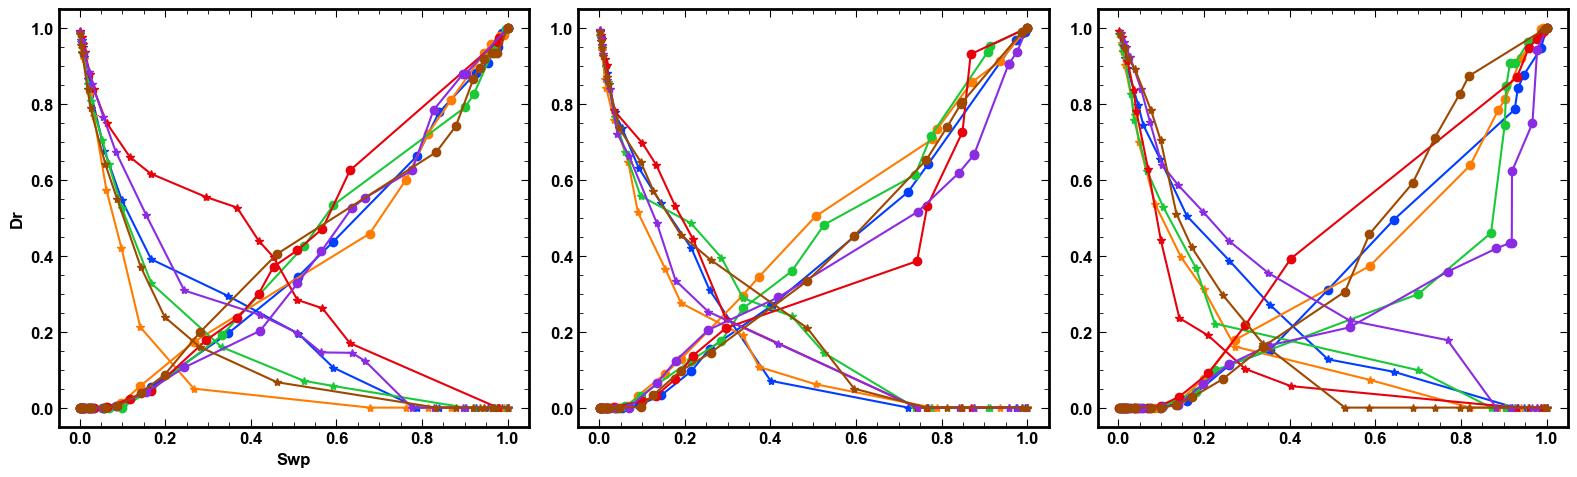

In [840]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))

colors = sns.color_palette('bright',6)


for r,region in enumerate(Snwparrs[0]):
    #pris
    ax1.plot(1-np.array(region), reldiffs_nwp[0][r], '*-', label='Dr_nwp', color=colors[r])
    ax1.plot(1-np.array(region), reldiffs_wp[0][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[1]):
    #uncomp?
    ax2.plot(1-np.array(region), reldiffs_nwp[1][r], '*-', label='Dr_nwp', color=colors[r])
    ax2.plot(1-np.array(region), reldiffs_wp[1][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[2]):
    #comp?
    ax3.plot(1-np.array(region), reldiffs_nwp[2][r], '*-', label='Dr_nwp', color=colors[r])
    ax3.plot(1-np.array(region), reldiffs_wp[2][r], 'o-', color=colors[r])



ax1.set_xlabel('Swp')
ax1.set_ylabel('Dr')
# ax.title('Relative Diffusivity in x direction')
# ax1.legend()
plt.show()

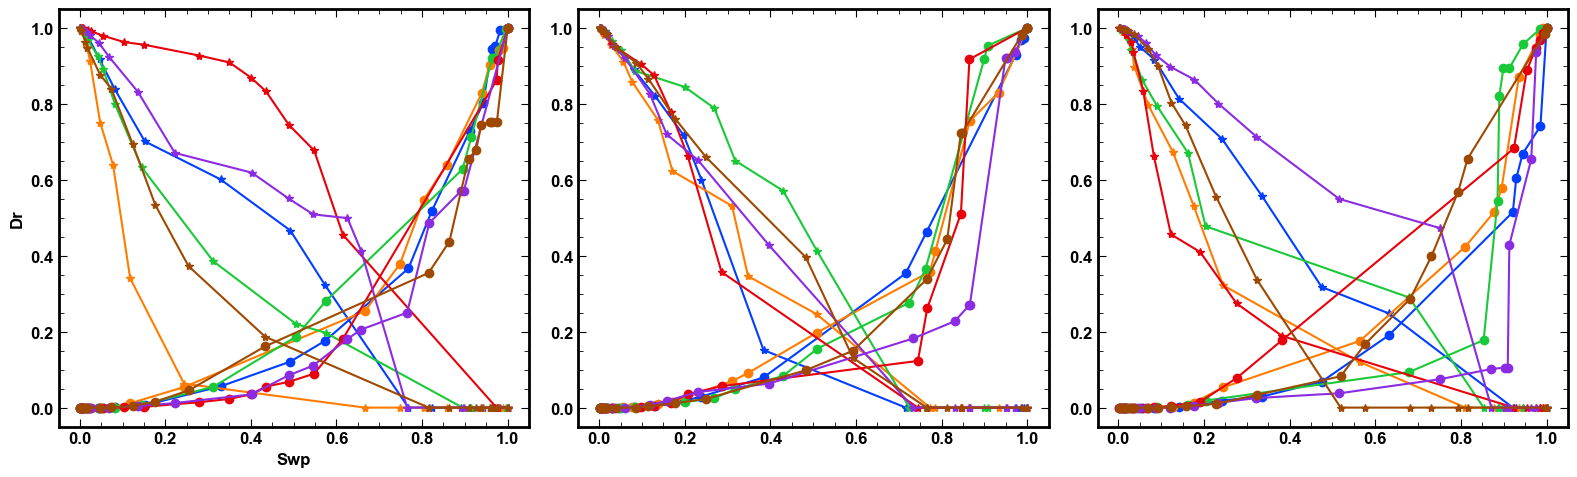

In [663]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))

colors = sns.color_palette('bright',6)



for r,region in enumerate(Snwparrs[0]):
    #pris
    ax1.plot(1-np.array(region), relperms_nwp[0][r], '*-', label='Dr_nwp', color=colors[r])
    ax1.plot(1-np.array(region), relperms_wp[0][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[1]):
    #uncomp?
    ax2.plot(1-np.array(region), relperms_nwp[1][r], '*-', label='Dr_nwp', color=colors[r])
    ax2.plot(1-np.array(region), relperms_wp[1][r], 'o-', color=colors[r])


for r,region in enumerate(Snwparrs[2]):
    #comp?
    ax3.plot(1-np.array(region), relperms_nwp[2][r], '*-', label='Dr_nwp', color=colors[r])
    ax3.plot(1-np.array(region), relperms_wp[2][r], 'o-', color=colors[r])



ax1.set_xlabel('Swp')
ax1.set_ylabel('Dr')
# ax.title('Relative Permeability in x direction')
# ax1.legend()
plt.show()

# Relative diffusivity and permeability curves - old

In [916]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y.network))
    pn_solid.append(pn_temp)
    
for x in snow_void:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y.network))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [917]:
for s,sample in enumerate(pn_total[1]):
    for r,region in enumerate(sample):
        h = op.utils.check_network_health(region)
        # print(h)

        op.topotools.trim(network=region, pores=h['disconnected_pores'])
        h = op.utils.check_network_health(region)
        region.regenerate_models()
        # print(h)

        region['pore.diameter'] = region['pore.extended_diameter']
        region['throat.diameter'] = region['throat.inscribed_diameter']

        conduit_lengths = op.models.geometry.conduit_lengths.spheres_and_cylinders(region)
        region['throat.length'] = conduit_lengths[:,1]

        region['pore.volume'] = op.models.geometry.pore_volume.sphere(region,pore_diameter='pore.equivalent_diameter')
        region['throat.volume'] = op.models.geometry.throat_volume.cylinder(region,throat_diameter='throat.diameter',throat_length='throat.length')



In [918]:
def sat_update(network, nwp, wp):
    r"""
        Calculates the saturation of each phase using occupancy information from ordinary percolation.
        Parameters
        ----------
        network: network
        nwp : phase
            non-wetting phase
        wp : phase
            wetting phase
    """
    pore_mask = nwp["pore.occupancy"] == 1
    throat_mask = nwp["throat.occupancy"] == 1
    sat_p = np.sum(network['pore.volume'][pore_mask])
    sat_t = np.sum(network['throat.volume'][throat_mask])
    sat1 = sat_p + sat_t
    bulk = network['pore.volume'].sum() + network['throat.volume'].sum()
    sat = sat1/bulk
    return sat

In [919]:
def Rate_calc_diff(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    Fd = op.algorithms.FickianDiffusion(network=network, phase=phase)
    Fd.settings._update({'conductance' : conductance})
    Fd.set_value_BC(pores=inlet, values=1)
    Fd.set_value_BC(pores=outlet, values=0)
    Fd.run()
    val = np.abs(Fd.rate(pores=inlet, mode='group'))
    return val

In [920]:
def Rate_calc_perm(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    St_p = op.algorithms.StokesFlow(network=network, phase=phase)
    St_p.settings._update({'conductance' : conductance})
    St_p.set_value_BC(pores=inlet, values=1)
    St_p.set_value_BC(pores=outlet, values=0)
    St_p.run()
    val = np.abs(St_p.rate(pores=inlet, mode='group'))
    return val

In [ ]:
test_region = pn_total[1][0][1]
# print(test_region)

test_region.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
test_region['pore.diffusivity'] = 1
test_region.regenerate_models()


air = op.phase.Species(network=test_region,species='oxygen', name='air')
air['pore.diffusivity'] = 2.4e-9
air['pore.viscosity'] = 20.55e-6
air['throat.surface_tension'] = 0.072
air['throat.contact_angle'] = 180
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()

water = op.phase.Water(network=test_region,name='water')
water['pore.diffusivity'] = 1e-9
water['throat.diffusivity'] = 1e-9
water['throat.surface_tension'] = 0.072
water['throat.contact_angle'] = 80
water.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

print(air['throat.entry_pressure'])

#this works, above doesnt
air = op.phase.Phase(network=test_region,name='air')
air['pore.surface_tension'] = 0.072
air['pore.contact_angle'] = 180.0
# air.add_model_collection(op.models.collections.phase.air)
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
water = op.phase.Water(network=test_region,name='water')
water['pore.diffusivity'] = 1e-9
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

print(air['throat.entry_pressure'])

# test_region['throat.diffusive_size_factors'] = op.models.geometry.diffusive_size_factors.spheres_and_cylinders(test_region)
# test_region['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive()
# test_region['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase)

op.algorithms.Drainage(network=test_region,phase=water).reset()
drn = op.algorithms.Drainage(network=test_region, phase=water)
drn.set_inlet_BC(test_region.pores('ymin'))
drn.run()

[01:36:44] WARNING  air is already taken, using air_39 instead                                      ]8;id=323549;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=915000;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  water is already taken, using water_38 instead                                  ]8;id=386282;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=644792;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

[5.3218e+07 5.3218e+07 5.3218e+07 ... 1.0408e+08 9.7029e+07 1.2954e+08]


Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [975]:
print(drn)


══════════════════════════════════════════════════════════════════════════════
drainage_45 : <openpnm.algorithms.Drainage at 0x19aec7ab0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.invasion_pressure                                        1658 / 1658
  3  throat.invasion_pressure                                      3397 / 3397
  4  pore.invasion_sequence                                        1658 / 1658
  5  throat.invasion_sequence                                      3397 / 3397
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                          

In [944]:
water['pore.occupancy'] = drn['pore.invasion_pressure'] < 10000
water['throat.occupancy'] = drn['throat.invasion_pressure'] < 10000
air['pore.occupancy'] = 1 - water['pore.occupancy']
air['throat.occupancy'] = 1 - water['throat.occupancy']

In [945]:
diff_in = test_region.pores('ymin')
diff_out = test_region.pores('ymax')

In [946]:

model_mp_cond = op.models.physics.multiphase.conduit_conductance
air.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
water.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
air.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
              throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
water.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
              throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')

In [947]:
Snwparr = []
reldiff_nwp = []
reldiff_wp = []

relperm_nwp = []
relperm_wp = []
for Pc in np.unique(drn['pore.invasion_pressure']):
    water['pore.occupancy'] = drn['pore.invasion_pressure'] < Pc
    water['throat.occupancy'] = drn['throat.invasion_pressure'] < Pc
    air['pore.occupancy'] = 1 - water['pore.occupancy']
    air['throat.occupancy'] = 1 - water['throat.occupancy']
    air.regenerate_models()
    water.regenerate_models()
    sat_point = sat_update(test_region, water, air)
    Snwparr.append(sat_point)
    Rate_single_nwp = Rate_calc_diff(test_region, air, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_single_wp = Rate_calc_diff(test_region, water, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_mult_nwp = Rate_calc_diff(test_region, air, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    Rate_mult_wp = Rate_calc_diff(test_region, water, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    reldiff_nwp.append(Rate_mult_nwp/Rate_single_nwp)
    reldiff_wp.append(Rate_mult_wp/Rate_single_wp)


    Rate_p_single_nwp = Rate_calc_perm(test_region, air, diff_in, diff_out, conductance = 'throat.hydraulic_conductance')
    Rate_p_single_wp = Rate_calc_perm(test_region, water, diff_in, diff_out, conductance = 'throat.hydraulic_conductance')
    Rate_p_mult_nwp = Rate_calc_perm(test_region, air, diff_in, diff_out, conductance = 'throat.conduit_hydraulic_conductance')
    Rate_p_mult_wp = Rate_calc_perm(test_region, water, diff_in, diff_out, conductance = 'throat.conduit_hydraulic_conductance')
    relperm_nwp.append(Rate_p_mult_nwp/Rate_p_single_nwp)
    relperm_wp.append(Rate_p_mult_wp/Rate_p_single_wp)

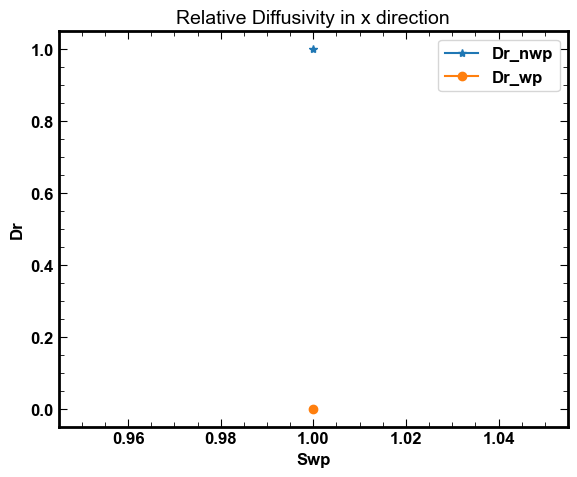

In [948]:
plt.figure(figsize=[6,5])
plt.plot(1-np.array(Snwparr), reldiff_nwp, '*-', label='Dr_nwp')
plt.plot(1-np.array(Snwparr), reldiff_wp, 'o-', label='Dr_wp')
plt.xlabel('Swp')
plt.ylabel('Dr')
plt.title('Relative Diffusivity in x direction')
plt.legend()

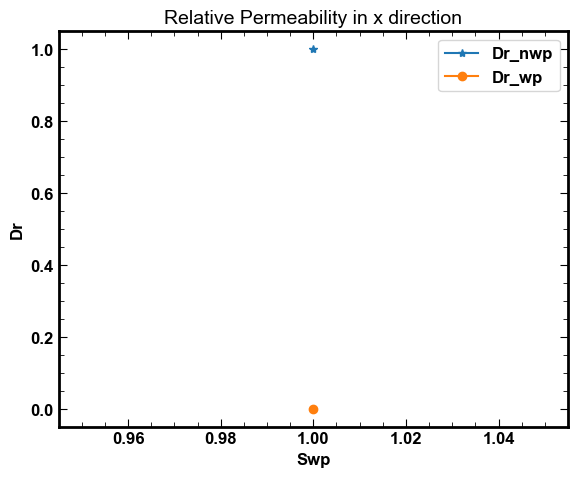

In [949]:
plt.figure(figsize=[6,5])
plt.plot(1-np.array(Snwparr), relperm_nwp, '*-', label='Dr_nwp')
plt.plot(1-np.array(Snwparr), relperm_wp, 'o-', label='Dr_wp')
plt.xlabel('Swp')
plt.ylabel('Dr')
plt.title('Relative Permeability in x direction')
plt.legend()